_**Я люблю кухни за то, что они хранят тайны...**_ (В. Цой)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re


data = pd.read_csv("main_task.csv")
display(data.head(7))
display(data.info())
display(data.describe())

Restaurant_id       City                                      Cuisine Style  \
0       id_5569      Paris            ['European', 'French', 'International']   
1       id_1535  Stockholm                                                NaN   
2        id_352     London  ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...   
3       id_3456     Berlin                                                NaN   
4        id_615     Munich  ['German', 'Central European', 'Vegetarian Fri...   
5       id_1418     Oporto                                                NaN   
6       id_1720      Milan                               ['Italian', 'Pizza']   

   Ranking  Rating Price Range  Number of Reviews  \
0   5570.0     3.5    $$ - $$$              194.0   
1   1537.0     4.0         NaN               10.0   
2    353.0     4.5        $$$$              688.0   
3   3458.0     5.0         NaN                3.0   
4    621.0     4.0    $$ - $$$               84.0   
5   1419.0     3.0         NaN                2.0   
6   1722.0     4.0           $               50.0   

                                             Reviews  \
0  [['Good food at your doorstep', 'A good hotel ...   
1  [['Unique cuisine', 'Delicious Nepalese food']...   
2  [['Catch up with friends', 'Not exceptional'],...   
3                                           [[], []]   
4  [['Best place to try a Bavarian food', 'Nice b...   
5  [['There are better 3 star hotel bars', 'Amazi...   
6  [['Excellent simple local eatery.', 'Excellent...   

                                              URL_TA      ID_TA  
0  /Restaurant_Review-g187147-d1912643-Reviews-R_...   d1912643  
1  /Restaurant_Review-g189852-d7992032-Reviews-Bu...   d7992032  
2  /Restaurant_Review-g186338-d8632781-Reviews-RO...   d8632781  
3  /Restaurant_Review-g187323-d1358776-Reviews-Es...   d1358776  
4  /Restaurant_Review-g187309-d6864963-Reviews-Au...   d6864963  
5  /Restaurant_Review-g189180-d12503536-Reviews-D...  d12503536  
6  /Restaurant_Review-g187849-d5808504-Reviews-Pi...   d5808504

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


None

Ranking        Rating  Number of Reviews
count  40000.000000  40000.000000       37457.000000
mean    3676.028525      3.993037         124.825480
std     3708.749567      0.668417         295.666352
min        1.000000      1.000000           2.000000
25%      973.000000      3.500000           9.000000
50%     2285.000000      4.000000          33.000000
75%     5260.000000      4.500000         115.000000
max    16444.000000      5.000000        9660.000000

* Restaurant_id — идентификационный номер ресторана / сети ресторанов;
* City — город, в котором находится ресторан;
* Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
* Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
* Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
* Price Range — диапазон цен в ресторане;
* Number of Reviews — количество отзывов о ресторане;
* Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
* URL_TA — URL страницы ресторана на TripAdvisor;
* ID_TA — идентификатор ресторана в базе данных TripAdvisor.

#### *Заменим некоторые имена на более удобные:*

In [2]:
#------------------------------------------------------------------------------#
data.columns = ["Restaurant_id", "City", "Cuisine_Style", "Ranking",
                "Rating", "Price_Range", "Number_of_Reviews", "Reviews", 
                "URL_TA", "ID_TA"]

#### *Информация о пропусках данных:*

Restaurant_id            0
City                     0
Cuisine_Style         9283
Ranking                  0
Rating                   0
Price_Range          13886
Number_of_Reviews     2543
Reviews                  0
URL_TA                   0
ID_TA                    0
dtype: int64

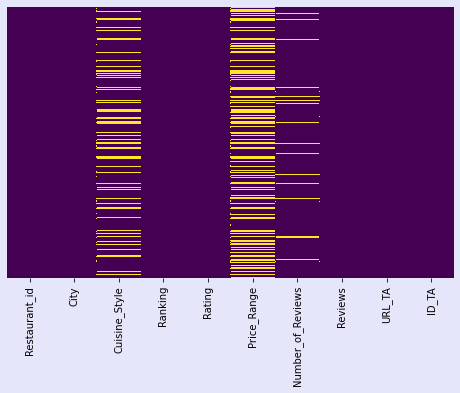

In [3]:
display(data.isnull().sum())
fig, ax = plt.subplots(figsize=(8,5), facecolor="Lavender")
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="viridis");

#### *Пропуски (из $40\,000$ записей):*

Cuisine_Style : $9\,283$   
Price_Range   : $13\,886$  
Number_of_Reviews : $2\,543$

#### *Пользовательские функции.*

In [4]:
#------------------------------------------------------------------------------#
# Изменение установок по умолчанию для графиков:
def set_rc_params():
    plt.rcParams.update({
        "axes.facecolor"       : "LightYellow",
        "axes.labelsize"       : 14,
        "axes.titlesize"       : 16,
        "axes.grid"            : True,
        "axes.grid.axis"       : "both",
        "grid.linestyle"       : "dotted",
        "grid.alpha"           : 0.75,
        "legend.facecolor"     : "Lavender",
        "legend.shadow"        : True,
        "legend.fontsize"      : 12,
        "legend.edgecolor"     : "black",
        "legend.title_fontsize": 11,
        "figure.facecolor"     : "Lavender",
        "xtick.labelsize"      : 12,
        "ytick.labelsize"      : 12,
        "font.size"            : 16
    })

# Переопределяем графические настройки:
set_rc_params()
#------------------------------------------------------------------------------#
def data_type(row):
    """
    Определяет тип данных.
    На входе:
        - запись из базы данных.
    На выходе:
        - запись с типом данных.
    """
    row = row.apply(lambda x: type(x))
    return row

#------------------------------------------------------------------------------#
def clean_name(str_val):
    """
    Преобразует строку с названиями кухонь в список [list] названий кухонь.
    На входе:
        - строковая переменная, содержащая названия кухонь.
    На выходе:
        - список [list] названий кухонь.
    """
    if pd.isna(str_val): return ["Unknown"]
    str_val = str_val.strip('[]') # Отбрасываем скобки.
    str_val = str_val.replace("\'",'') # Убираем надоедливые кавычки '.
    str_val = str_val.split(", ") # Разбиваем строку по названиям кухонь.
    return str_val

#------------------------------------------------------------------------------#


### 1. Обзор данных. Заполнение пропусков. Формирование новых признаков.

---
#### *Типы данных.*

In [5]:
df = data.copy(); df = df.apply(data_type)
df.head()

Restaurant_id           City    Cuisine_Style          Ranking  \
0  <class 'str'>  <class 'str'>    <class 'str'>  <class 'float'>   
1  <class 'str'>  <class 'str'>  <class 'float'>  <class 'float'>   
2  <class 'str'>  <class 'str'>    <class 'str'>  <class 'float'>   
3  <class 'str'>  <class 'str'>  <class 'float'>  <class 'float'>   
4  <class 'str'>  <class 'str'>    <class 'str'>  <class 'float'>   

            Rating      Price_Range Number_of_Reviews        Reviews  \
0  <class 'float'>    <class 'str'>   <class 'float'>  <class 'str'>   
1  <class 'float'>  <class 'float'>   <class 'float'>  <class 'str'>   
2  <class 'float'>    <class 'str'>   <class 'float'>  <class 'str'>   
3  <class 'float'>  <class 'float'>   <class 'float'>  <class 'str'>   
4  <class 'float'>    <class 'str'>   <class 'float'>  <class 'str'>   

          URL_TA          ID_TA  
0  <class 'str'>  <class 'str'>  
1  <class 'str'>  <class 'str'>  
2  <class 'str'>  <class 'str'>  
3  <class 'str'>  <class 'str'>  
4  <class 'str'>  <class 'str'>

#### *Типы данных. Вывод.*  
Только три признака имеют числовой тип данных: Ranking, Number_of_Reviews и целевой признак Rating.  
Наличие типа float среди данных типа str - это пропуски данных NaN.
***

---
#### *1.1. Целевая переменная Rating.*

Rating       1.0  1.5  2.0  2.5   3.0   3.5    4.0    4.5   5.0
Количество:  201  139  466  915  2955  6824  13692  10929  3879

Медиана: 4.0; Среднее: 3.99; Коэф. асиметрии: -1.055


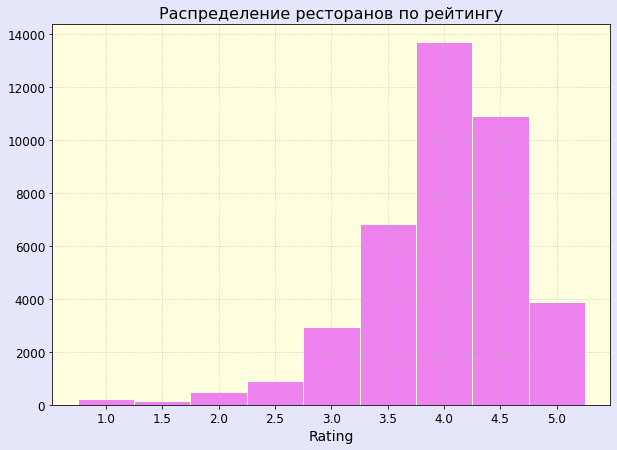

In [6]:
#------------------------------------------------------------------------------#
df = data.copy()
#---
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xticks(np.arange(1, 5.5, 0.5))
#---
h1 = {'color': 'violet', 'alpha': 1, 'ec': 'lightyellow', 'align': 'left'}
bins = [k for k in np.arange(1, 6, 0.5)]
#---
sns.distplot(df.Rating, hist_kws=h1, kde=False, norm_hist=False, bins=bins)
#---
ax.set_title("Распределение ресторанов по рейтингу")
#------------------------------------------------------------------------------#
df_gr = df.groupby("Rating")[["City"]].count(); df_gr.columns = ["Количество:"]
display(df_gr.T)
med = df.Rating.median(); mean_val = df.Rating.mean()
As = df.Rating.skew().round(3)
print(f"Медиана: {med}; Среднее: {round(mean_val, 2)}; Коэф. асиметрии: {As}")

#### *1.1. Целевая переменная Rating. Выводы.*  
1. Целевая переменная меняется от 1 до 5 с шагом 0.5.  
2. Оценка 4 встречается наиболее часто среди ресторанов.
2. Распределение ресторанов по величине Rating несколько сдвинуто в область высоких рейтингов, т.е. распределение имеет длинный левый хвост. В этом случае медиана рейтинга превышает среднюю величину рейтинга. Впрочем, левый хвост очень лёгкий, и заметного различия между медианой и средним не наблюдается.
---

***
#### *1.2. Признак City. Города, представленные в базе данных.*

In [7]:
#------------------------------------------------------------------------------#
df = data.copy()
num_city = df.City.nunique()
print(f"Всего городов {num_city}:")
cities = pd.DataFrame(df.City.value_counts())
cities.columns = ["Рестораны"]
display(cities)
print("\n\nПервая десятка по количеству ресторанов:")
display(cities.head(10).T)
print("\n\nПоследняя десятка по количеству ресторанов:")
cities.tail(10).T

Всего городов 31:


Рестораны
London           5757
Paris            4897
Madrid           3108
Barcelona        2734
Berlin           2155
Milan            2133
Rome             2078
Prague           1443
Lisbon           1300
Vienna           1166
Amsterdam        1086
Brussels         1060
Hamburg           949
Munich            893
Lyon              892
Stockholm         820
Budapest          816
Warsaw            727
Dublin            673
Copenhagen        659
Athens            628
Edinburgh         596
Zurich            538
Oporto            513
Geneva            481
Krakow            443
Oslo              385
Helsinki          376
Bratislava        301
Luxembourg        210
Ljubljana         183



Первая десятка по количеству ресторанов:


London  Paris  Madrid  Barcelona  Berlin  Milan  Rome  Prague  \
Рестораны    5757   4897    3108       2734    2155   2133  2078    1443   

           Lisbon  Vienna  
Рестораны    1300    1166



Последняя десятка по количеству ресторанов:


Edinburgh  Zurich  Oporto  Geneva  Krakow  Oslo  Helsinki  \
Рестораны        596     538     513     481     443   385       376   

           Bratislava  Luxembourg  Ljubljana  
Рестораны         301         210        183

*Посмотрим на распределение ресторанов городов по целевому признаку - на примере трёх первых (London, Paris, Madrid) и трёх последних (Bratislava, Luxembourg, Ljubljana) городов.*

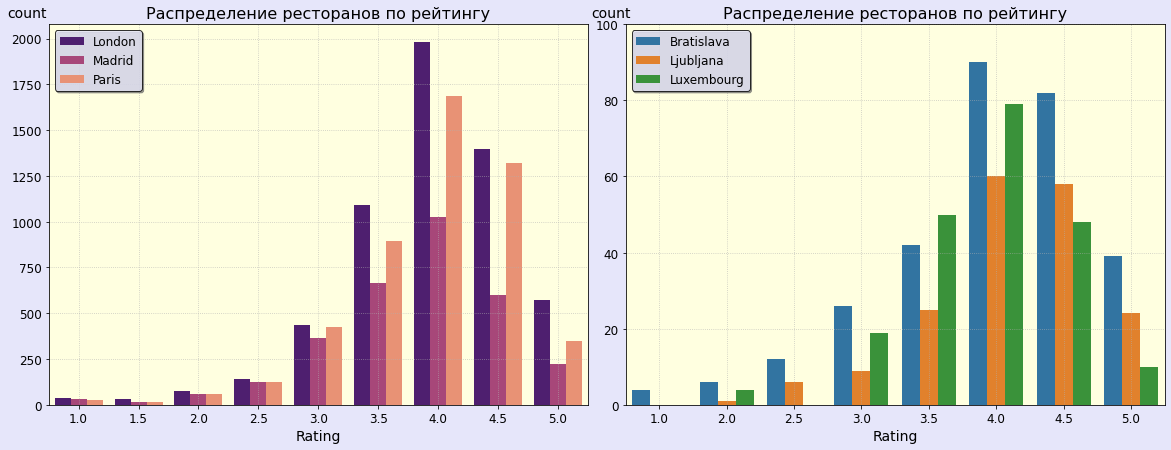

In [8]:
#------------------------------------------------------------------------------#
fig, ax = plt.subplots(1, 2, figsize=(20, 7)); fig.subplots_adjust(wspace=0.07);
[axs.set_xticks(np.arange(1, 5.5, 0.5)) for axs in ax]
# Первые три города:
LPM = df[df.City.isin(["London","Paris","Madrid"])].groupby(
                                                ["City","Rating"]).ID_TA.count()
LPM = LPM.reset_index().rename({"ID_TA": "Count"}, axis="columns")
# Последние три города:
BLL = df[df.City.isin(["Bratislava","Luxembourg","Ljubljana"])].groupby(
                                                ["City","Rating"]).ID_TA.count()
BLL = BLL.reset_index().rename({"ID_TA": "Count"}, axis="columns")
#------------------------------------------------------------------------------#
sns.barplot(x="Rating", y="Count", hue="City", data=LPM, ci=None, ax=ax[0],
            palette="magma")
sns.barplot(x="Rating", y="Count", hue="City", data=BLL, ci=None, ax=ax[1])
#---
[axs.grid("both") for axs in ax]
[axs.set_ylabel("count", rotation=0, position=(0, 1.01), ha="left")
                                                                for axs in ax];
ax[1].set_yticks(range(0, 120, 20));
[axs.legend(loc="upper left") for axs in ax];
[axs.set_title("Распределение ресторанов по рейтингу") for axs in ax];

#### *1.2. Признак City. Города, представленные в базе данных. Выводы.*  
Итак, в базе данных имеются сведения о 31-ом городе Европы.  
В десятку наиболее упоминаемых вошли крупнейшие столицы европейских стран: Лондон, Париж, Берлин, Рим, Мадрид и т.д.
Распределение ресторанов выбранных городов носит, в целом, одинаковый характер, описанный выше при рассмотрении целевого признака Rating.

*Признак City является категориальным номинального типа.*
***

---
#### *1.3. Признак Ranking. Ранг ресторана.*
Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города.  

Несколько странная формулировка. Непонятно, как именно определяется место ресторана среди других ресторанов города.  
В самом деле, есть рейтинг ресторана, он определяется на основе отзывов посетителей ресторана. Но как назначается ранг (rank) ресторана и какой в нём смысл? Казалось бы, рейтинга вполне достаточно. Да, будет группа ресторанов с одним рейтингом. Ну и что?

*Рассмотрим признак Rating подробнее.*

Ranking  Rating
Ranking     1.00   -0.37
Rating     -0.37    1.00

Rating       1.0  1.5  2.0  2.5   3.0   3.5    4.0    4.5   5.0
Количество:  201  139  466  915  2955  6824  13692  10929  3879

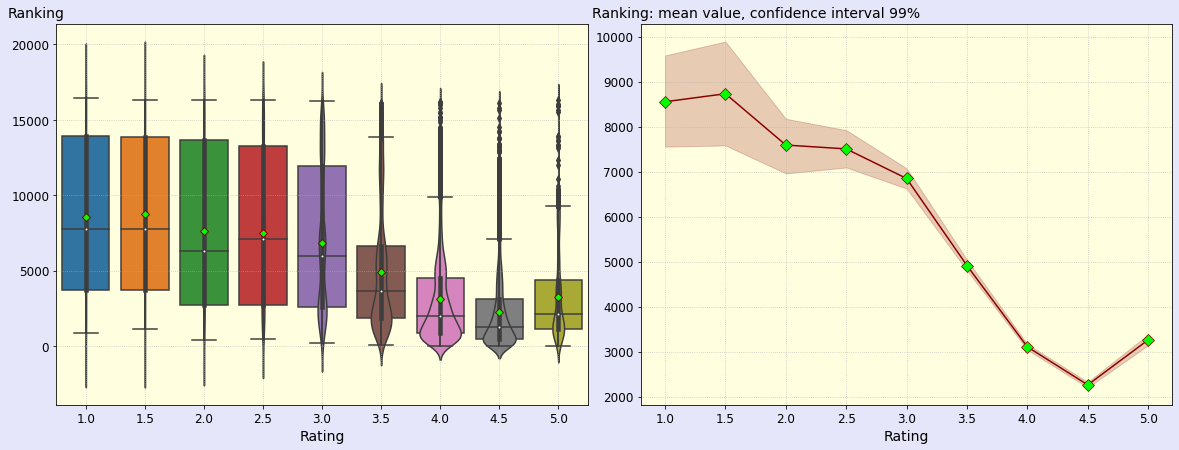

In [9]:
#------------------------------------------------------------------------------#
df = data.copy()
# Оценим степень связи признака Ranking с целевым признаком Rating:
display(df[["Ranking", "Rating"]].corr().round(2))
display(df_gr.T)
# Связь довольно выраженная, причём отрицательная, т.е. чем выше рейтинг
# ресторана, тем ниже его ранг. Таким образом, можно предположить, что ранг - 
# некое подобие места спортсмена в общем списке спортсменов данного вида спорта.
#---
# Общее распределение ранга в зависимости от рейтинга ресторана:
fig, ax = plt.subplots(1, 2, figsize=(20, 7)); fig.subplots_adjust(wspace=0.1)
# Боксплоты с воланчиками:
mean_props = dict(marker='D', markeredgecolor='DarkRed',
                  markerfacecolor='lime')
sns.boxplot(x="Rating", y="Ranking", data=df, showmeans=True, ax=ax[0],
            meanprops=mean_props);
sns.violinplot(x=df.Rating, y=df.Ranking, width=0.7, scale="count", ax=ax[0])
# Среднее:
sns.lineplot(data=df, x="Rating", y="Ranking", ci=99, ax=ax[1], color="DarkRed",
             marker='D', mec="DarkRed", mfc="lime", ms=8)
#------------------------------------------------------------------------------#
[axs.grid("both") for axs in ax];
ax[0].set_ylabel("Ranking", rotation=0, position=(0, 1.01), ha="left");
ax[1].set_ylabel("Ranking: mean value, confidence interval 99%", rotation=0,
                 position=(0, 1.01), ha="left");
ax[1].set_yticks(range(2000,11000,1000));

Общая тенденция: чем больше рейтинг ресторанов, тем меньше не только ранг, но и разброс в величинах ранга. Так, например, 75% ранговых значений у ресторанов с рейтингом 4 и более не превышают величины в 5000. Средний ранг у ресторанов с рейтингом 4.5 близок к 2000.

*Проверим на уникальность ранговых значений в каждом городе (т.е. нет ли в городе ресторанов с одинаковым рангом). Заодно поглядим на максимальные и минимальные величины ранга в ресторанах городов:*

In [10]:
#------------------------------------------------------------------------------#
grp = df.groupby("City").Ranking.agg(
    ["min", "count", "nunique", "max"]).sort_values(by="count", ascending=False)
grp["net"] = grp["nunique"] - grp["count"]
display(grp)
print("\nГорода с минимальным рангом, равным 1:")
grp[grp["min"]==1][["min"]].T

min  count  nunique      max  net
City                                         
London      1.0   5757     5757  16444.0    0
Paris       3.0   4897     4897  13986.0    0
Madrid      1.0   3108     3108   8809.0    0
Barcelona   5.0   2734     2734   7796.0    0
Berlin      2.0   2155     2155   6372.0    0
Milan       1.0   2133     2133   6275.0    0
Rome        1.0   2078     2078   5946.0    0
Prague      2.0   1443     1443   4188.0    0
Lisbon      1.0   1300     1300   3717.0    0
Vienna      1.0   1166     1166   3444.0    0
Amsterdam   1.0   1086     1086   3249.0    0
Brussels    3.0   1060     1060   3004.0    0
Hamburg     1.0    949      949   2736.0    0
Munich      3.0    893      893   2763.0    0
Lyon        1.0    892      892   2666.0    0
Stockholm   1.0    820      820   2464.0    0
Budapest    1.0    816      816   2438.0    0
Warsaw      1.0    727      727   2141.0    0
Dublin      8.0    673      673   1960.0    0
Copenhagen  3.0    659      659   1964.0    0
Athens      6.0    628      628   1787.0    0
Edinburgh   1.0    596      596   1766.0    0
Zurich      2.0    538      538   1590.0    0
Oporto      4.0    513      513   1484.0    0
Geneva      5.0    481      481   1413.0    0
Krakow      1.0    443      443   1244.0    0
Oslo        1.0    385      385   1137.0    0
Helsinki    5.0    376      376   1141.0    0
Bratislava  3.0    301      301    889.0    0
Luxembourg  2.0    210      210    621.0    0
Ljubljana   3.0    183      183    468.0    0


Города с минимальным рангом, равным 1:


City  London  Madrid  Milan  Rome  Lisbon  Vienna  Amsterdam  Hamburg  Lyon  \
min      1.0     1.0    1.0   1.0     1.0     1.0        1.0      1.0   1.0   

City  Stockholm  Budapest  Warsaw  Edinburgh  Krakow  Oslo  
min         1.0       1.0     1.0        1.0     1.0   1.0

Таким образом, в каждом из городов величина ранга является уникальной и рестораны города с одинаковым рангом отстутствуют.  
Кроме того, лишь в половине (точнее в 15 из 31) городов минимальный ранг равен 1.

*Проверим реальность существования самого плохого ресторана (максимальный ранг и минимальный рейтинг) и хорошего ресторана с максимальным рейтингом, но и максимальным рангом:*

In [11]:
# Самый плохой ресторан:
display(grp[grp["max"]==grp["max"].max()])
London = data[data.City=="London"]
display(London[London.Ranking==London.Ranking.max()].URL_TA.values)
# Хороший ресторан в Лондоне (максимальный рейтинг, но и максимальный ранг):
London_Rating_5 = London[London.Rating==5]
display(London_Rating_5[London_Rating_5.Ranking==London_Rating_5.Ranking.max()].URL_TA.values)

min  count  nunique      max  net
City                                     
London  1.0   5757     5757  16444.0    0

array(['/Restaurant_Review-g186338-d720554-Reviews-Singapura_Blackfriars-London_England.html'],
      dtype=object)

array(['/Restaurant_Review-g186338-d12794200-Reviews-Best_Fried_Chicken-London_England.html'],
      dtype=object)

### Самый плохой ресторан.
#### За прошедшие три года (исходная база данных относится к 2018 году) многое поменялось. Особенно сильное негативное воздействие на ресторанный бизнес оказала пандемия коронавируса. Однако отвратительная кухня и плохое обслуживание не стали цениться больше (хотя ранг этого ресторана и снизился):

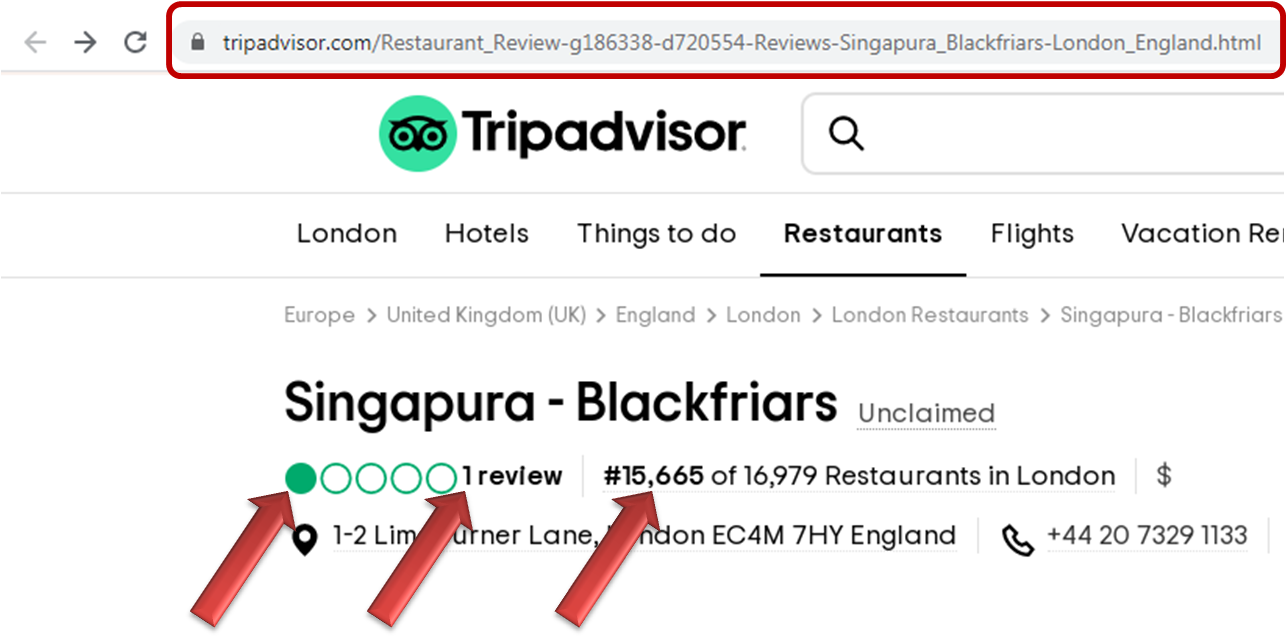

#### Иначе говоря, ранг в 16444 ед. соответствует реальному заведению.

### Хороший ресторан в Лондоне (Rating = 5, но Ranking = max(среди Rating=5)).
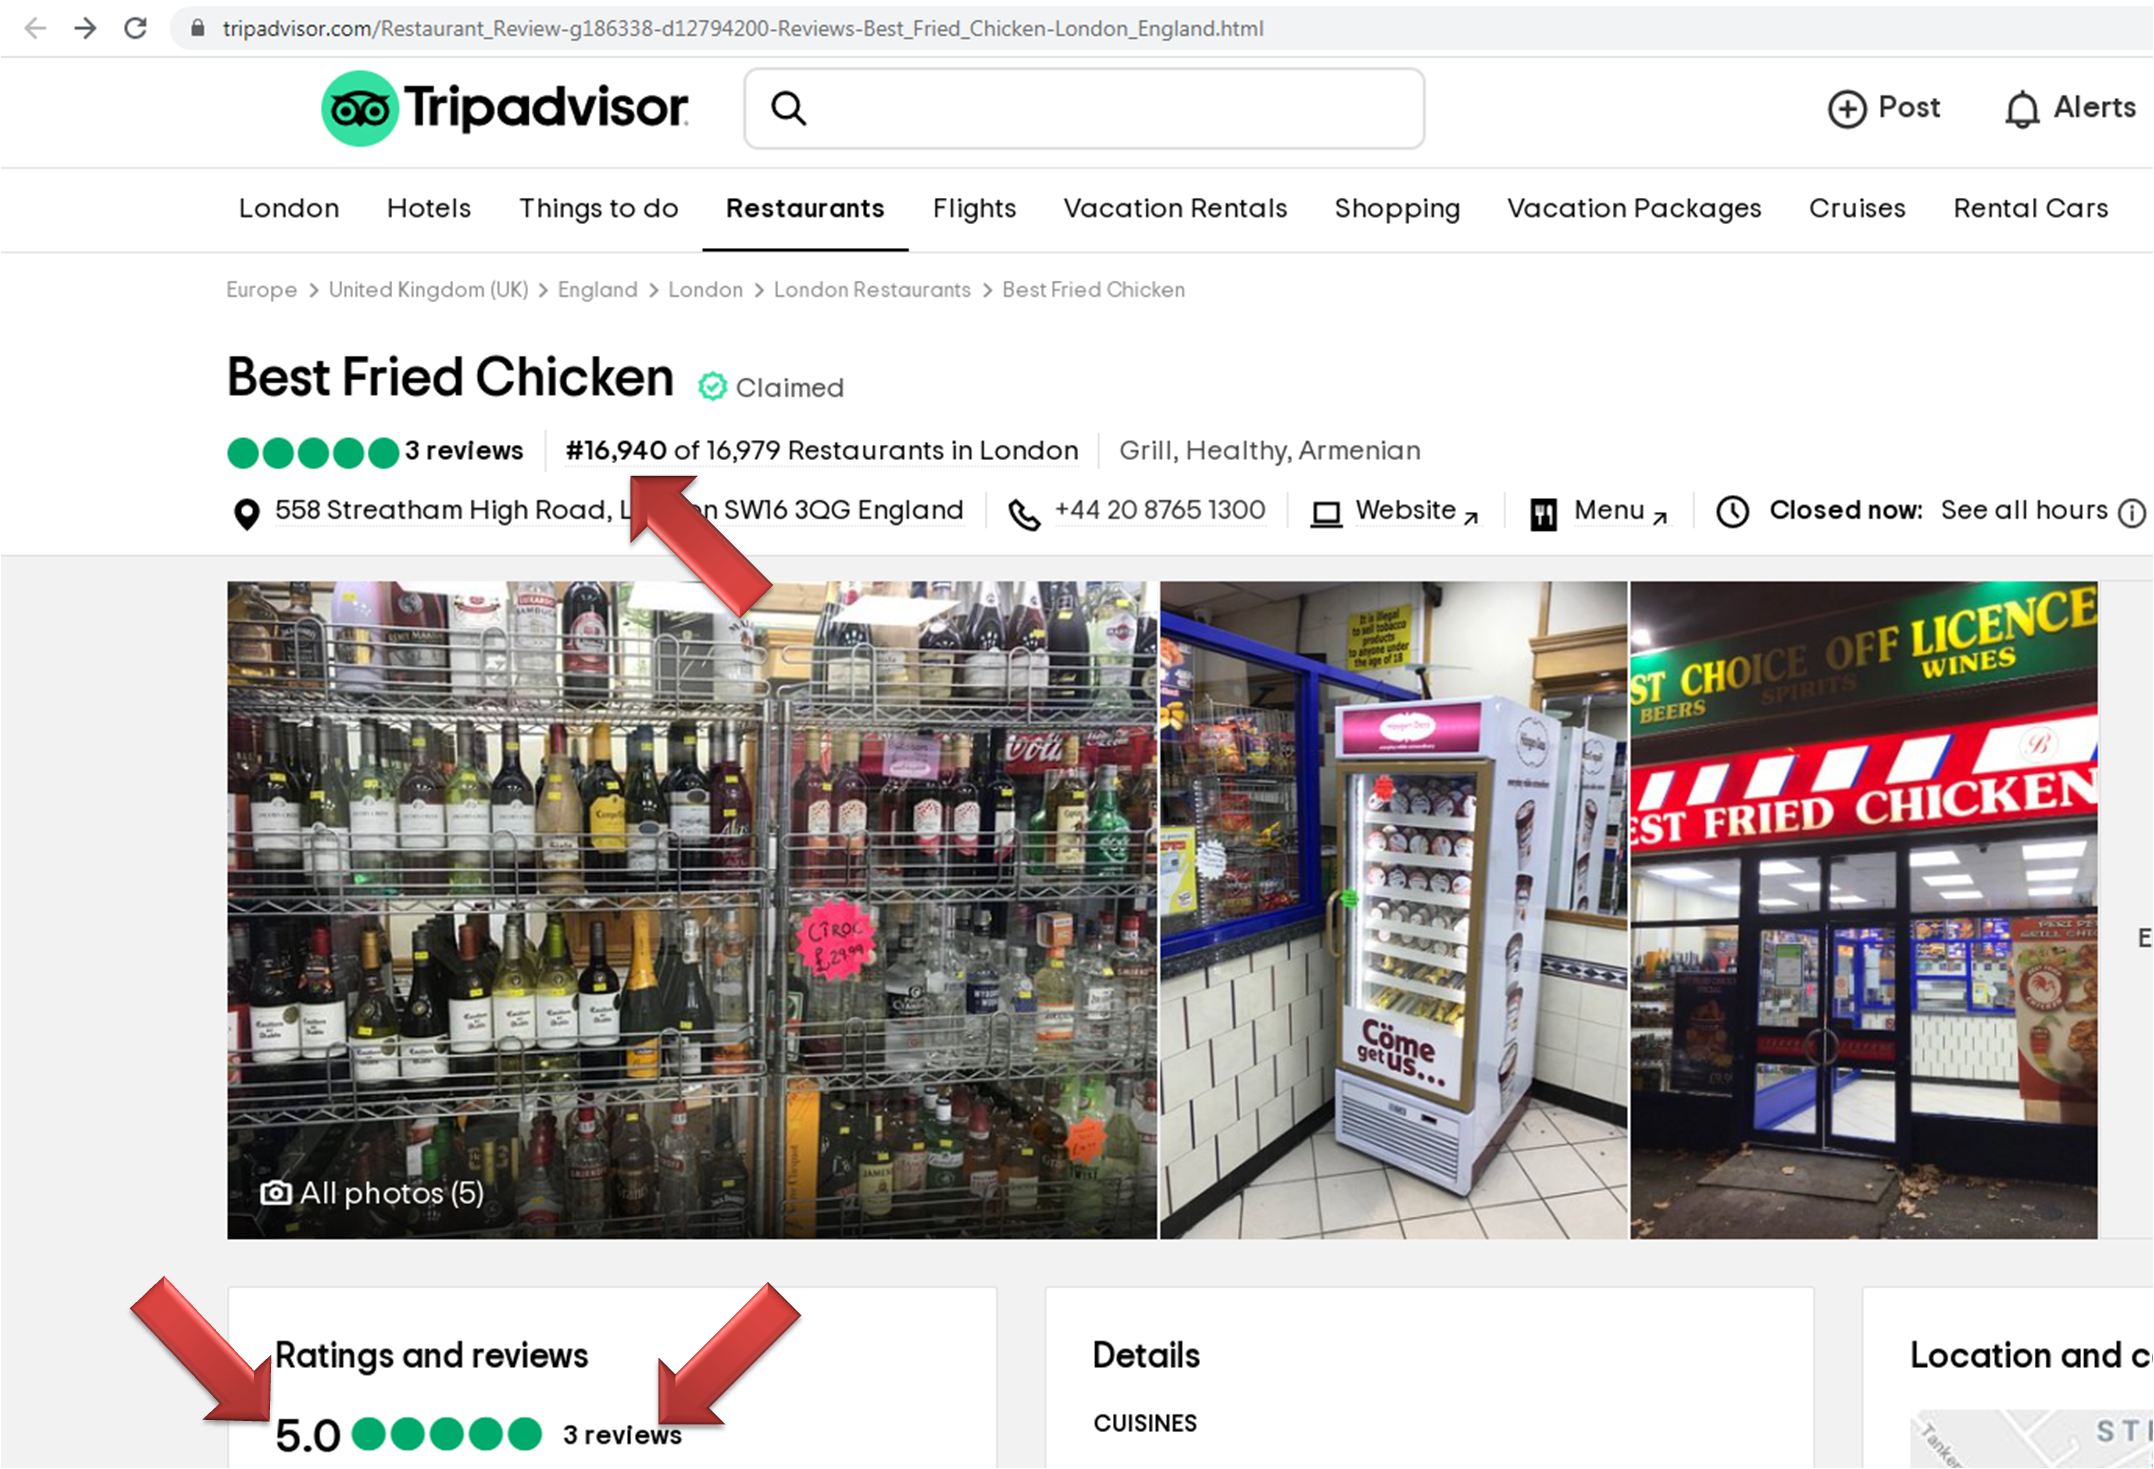

#### Вот так - всего три отзыва (причём последний - в 2020 г.), зато рейтинг 5. Правда, ранг самый последний (из всех ресторанов Лондона с рейтиногм 5).

Изучение сайта TripAdvisor.com в части ресторанов Лондона и Любляны показывает следующее:  
1. Количество ресторанов заметно больше максимального ранга - очень много ресторанов не имеют ранга, но учитываются в нумерации ресторанов. Я не нашёл указания ранга у тех ресторанов, у которых нет отзывов.
2. В Любляне первый ресторан (с конца) с максимальным рангом 539 из 539 ресторанов уже имеет один отзыв, т.е. можно сделать вывод, что ресторан начинает учитываться в системе ранжирования ресторанов города только после появления отзыва о нём на сайте TripAdvisor:
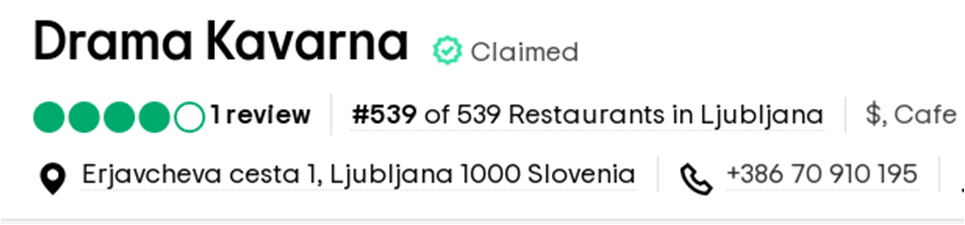

*Посмотрим на распределение ранга и рейтинга для первых трёх и последних трёх городов.*

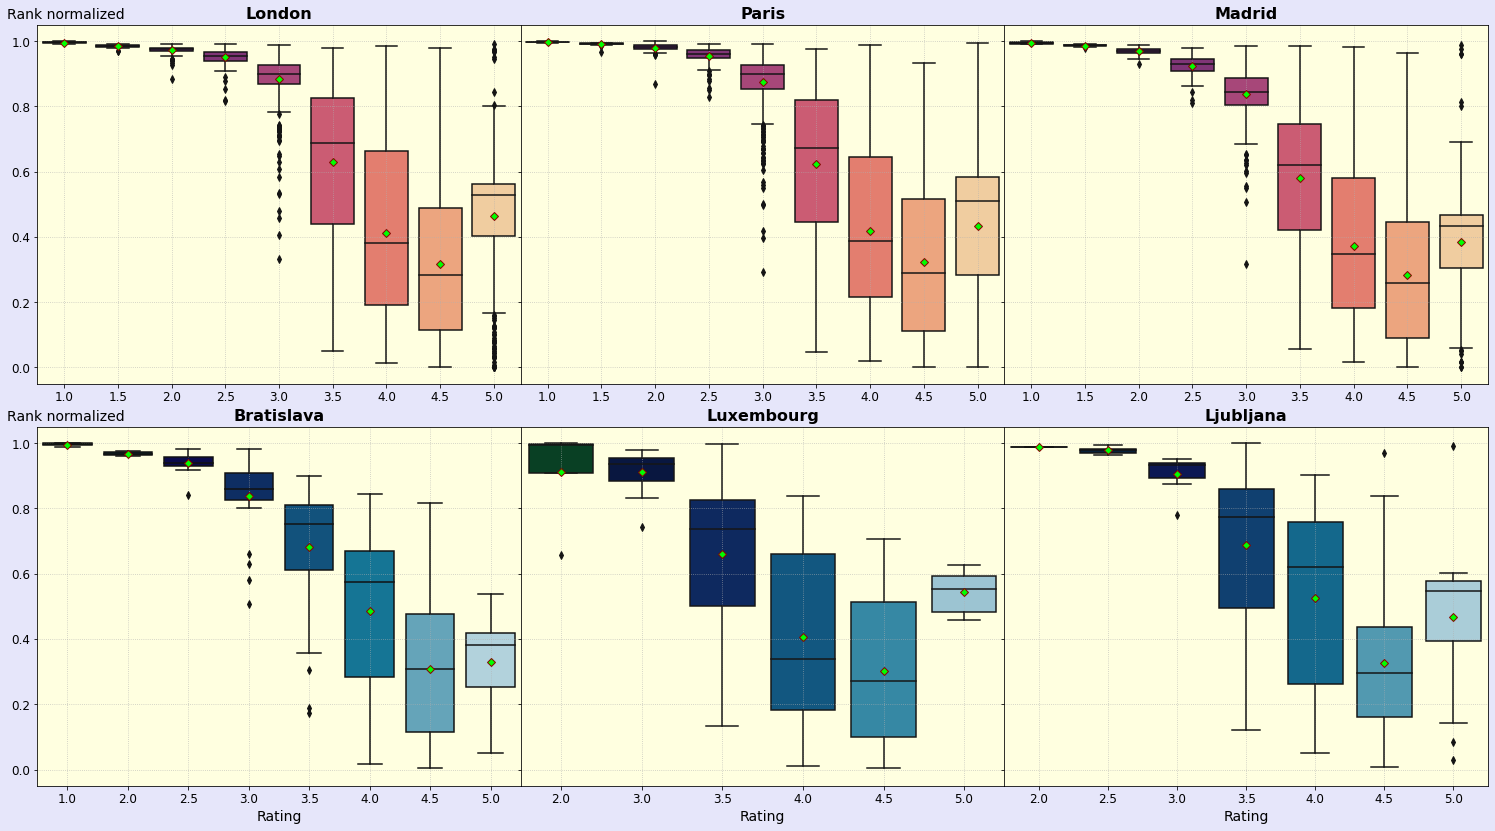

In [12]:
#------------------------------------------------------------------------------#
# Приведём к одной шкале, чтобы можно было сравнивать:
df1 = df[["Rating", "Ranking", "City"]].copy()
for city in cities.index:
    city_Rank_max = df1[df1.City==city].Ranking.max()
    df1.loc[df1.City==city, "Ranking"] = df1.loc[
                                    df1.City==city, "Ranking"] / city_Rank_max
#------------------------------------------------------------------------------#
fig, ax = plt.subplots(2, 3, figsize=(26, 14), sharey=True);
fig.subplots_adjust(wspace=0); fig.subplots_adjust(hspace=0.12)
mean_props = dict(marker='D', markeredgecolor='DarkRed', markerfacecolor='lime')
# Первые три города:
for k, city in enumerate(cities.head(3).index):
    sns.boxplot(x="Rating", y="Ranking", data=df1[df1.City==city], ax=ax[0, k],
                showmeans=True, meanprops=mean_props, palette="magma");
    ax[0,k].set_title(city, fontweight="bold");
# Последние три города:
for k, city in enumerate(cities.tail(3).index):
    sns.boxplot(x="Rating", y="Ranking", data=df1[df1.City==city], ax=ax[1, k],
                showmeans=True, meanprops=mean_props, palette="ocean");
    ax[1,k].set_title(city, fontweight="bold");
#------------------------------------------------------------------------------#
[ax[i,j].grid("both") for i in (0,1) for j in (0,1,2)];
[ax[i,0].set_ylabel("Rank normalized", rotation=0, position=(0,1.01), ha="left")
                                                                for i in (0,1)];
[ax[i,j].set_ylabel('') for i in (0,1) for j in (1,2)];
[ax[0,j].set_xlabel('') for j in (0,1,2)];

#### *1.3. Признак Ranking. Ранг ресторана. Выводы.*

1. Количество ресторанов в городе превышает количество ресторанов, участвующих в ранжировании. Открываются новые рестораны, им присваиваются порядковые номера, но ранжирование начинается после появления первого отзыва.
2. Насколько я понял, ранг ресторана подобен месту спортсмена в общем списке спортсменов данного вида спорта. Положение спортсмена в этом списке зависит от многих факторов, но самый главный из них - это активная профильная деятельность (участие в соревнованиях, получение призовых мест и т.п.). Мы видим в случае с ресторанами, что коэффициент корреляции ранга и рейтинга отрицательный, т.е. чем выше рейтинг ресторана, тем ближе ресторан к первым местам в ранжировании. Наименьший средний ранг ресторана имеет место для рейтинга в 4.5 ед.
3. В отдельно взятом городе ранг ресторана является уникальным - в пределах города нет ресторанов с одинаковым рангом. В половине городов (16 из 31) отсутствуют рестораны с рангом, равным 1.

Несомненно, что у специалистов TripAdvisor есть алгоритм определения ранга и рейтинга ресторана. Конечно, он основывается на количестве отзывов, стабильности оценок в отзывах и т.п. Одно можно утверждать точно - у ресторанов города первой, к примеру, десятки (по рангу) рейтинг должен быть высоким.
***

***
#### *1.4. Признак Number_of_Reviews. Количество отзывов посетителей о ресторане.*

*Пропуски:*  
Number_of_Reviews : $2\,543$

Ranking  Rating  Number_of_Reviews
Ranking               1.00   -0.37              -0.22
Rating               -0.37    1.00               0.03
Number_of_Reviews    -0.22    0.03               1.00

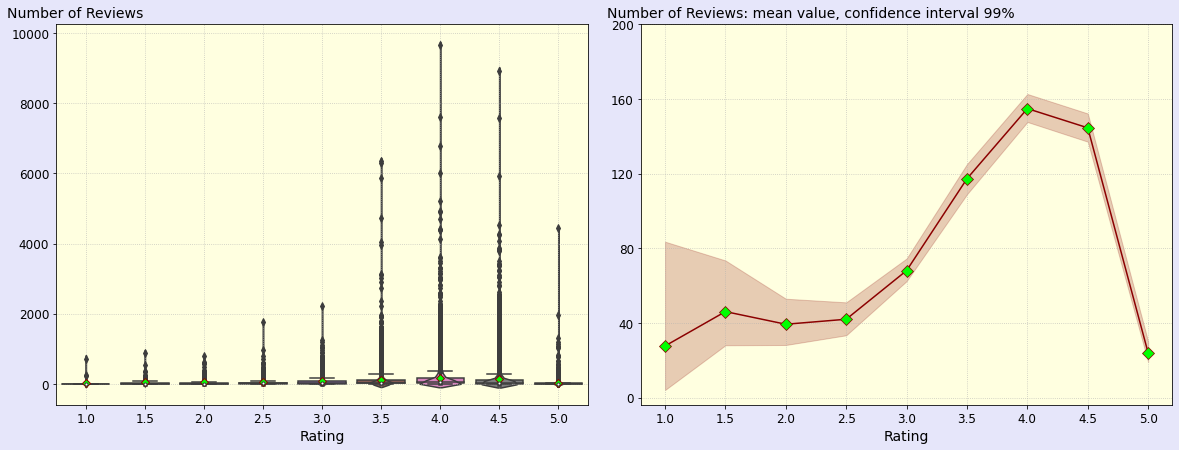

In [13]:
#------------------------------------------------------------------------------#
df = data.copy()
# Коэффициент корреляции:
display(df[["Ranking", "Rating", "Number_of_Reviews"]].corr().round(2))
# Общее распределение числа отзывов в зависимости от рейтинга ресторана:
fig, ax = plt.subplots(1, 2, figsize=(20, 7)); fig.subplots_adjust(wspace=0.1)
# Боксплоты с воланчиками:
mean_props = dict(marker='D', markeredgecolor='DarkRed',
                  markerfacecolor='lime')
sns.boxplot(x="Rating", y="Number_of_Reviews", data=df, showmeans=True,
            ax=ax[0], meanprops=mean_props);
sns.violinplot(x=df.Rating, y=df.Number_of_Reviews, width=0.7, scale="count",
               ax=ax[0])
# Среднее:
sns.lineplot(data=df, x="Rating", y="Number_of_Reviews", ci=99, ax=ax[1],
             color="DarkRed", marker='D', mec="DarkRed", mfc="lime", ms=8)
#------------------------------------------------------------------------------#
[axs.grid("both") for axs in ax];
ax[0].set_ylabel("Number of Reviews", rotation=0, position=(0, 1.01),
                 ha="left");
ax[1].set_ylabel("Number of Reviews: mean value, confidence interval 99%",
                 rotation=0, position=(0, 1.01), ha="left");
ax[1].set_yticks(range(0,240,40));

*Оценим визуально слабую отрицательную связь между количеством отзывов и рангом.*  
Для пущей красоты ранжируем признак Ranking по попаданию в один из десяти диапазонов [0, 10%], (10%, 20%], ..., (90%, 100%].

0     1     2     3     4     5     6     7     8     9
Diapason     10    20    30    40    50    60    70    80    90   100
hit count  3989  4021  3947  4036  4112  3998  3997  3988  4008  3904

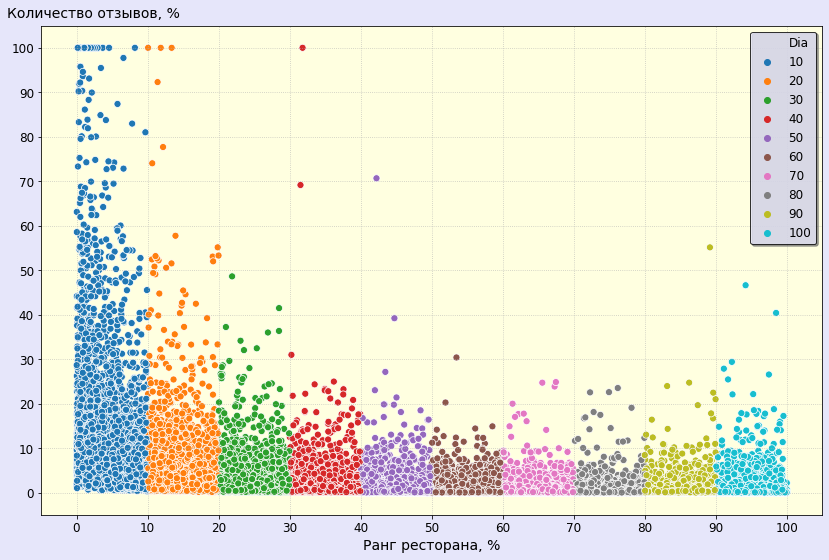

In [14]:
#------------------------------------------------------------------------------#
def rest_range(row):
    for k in range(10, 110, 10):
        if row.loc["Ranking"] > k - 10 and row.loc["Ranking"] <= k :
            return k

# Нормируем на 100% с учётом города:
df = data.copy()
for city in cities.index:
    city_Rank_max = df[df.City==city].Ranking.max()
    city_Rev_max = df[df.City==city].Number_of_Reviews.max()
    df.loc[df.City==city, "Ranking"] = df.loc[
                                df.City==city, "Ranking"] / city_Rank_max * 100
    df.loc[df.City==city, "Number_of_Reviews"] = df.loc[
                       df.City==city, "Number_of_Reviews"] / city_Rev_max * 100
# Признак "Dia" (Diapason) равен 10 при попадании ресторана в 1-ый диапазон,
# 20 - во второй диапазон и т.п.:
df["Dia"] = df.apply(lambda row: rest_range(row), axis="columns")
#------------------------------------------------------------------------------#
# Рисуем:
fig, ax = plt.subplots(figsize=(14,9))
sns.scatterplot(data=df, x="Ranking", y="Number_of_Reviews", hue="Dia",
                palette="tab10", s=50);
#---
ax.set_xticks(range(0,110,10)); ax.set_yticks(range(0,110,10))
ax.set_ylabel("Количество отзывов, %", rotation=0, position=(0,1.01), ha="left")
ax.set_xlabel("Ранг ресторана, %")
#---
pd.DataFrame(df.Dia.value_counts().sort_index()).reset_index().rename(
                        {"index": "Diapason", "Dia": "hit count"}, axis=1).T

*Проверим выбросы на реальность:*

In [15]:
max_Num = data.Number_of_Reviews.max()
print(max_Num)
print(data[data.Number_of_Reviews==max_Num].URL_TA.values)

9660.0
['/Restaurant_Review-g186338-d1421189-Reviews-London_Steakhouse_Co-London_England.html']


#### Да, реальность имеет место:
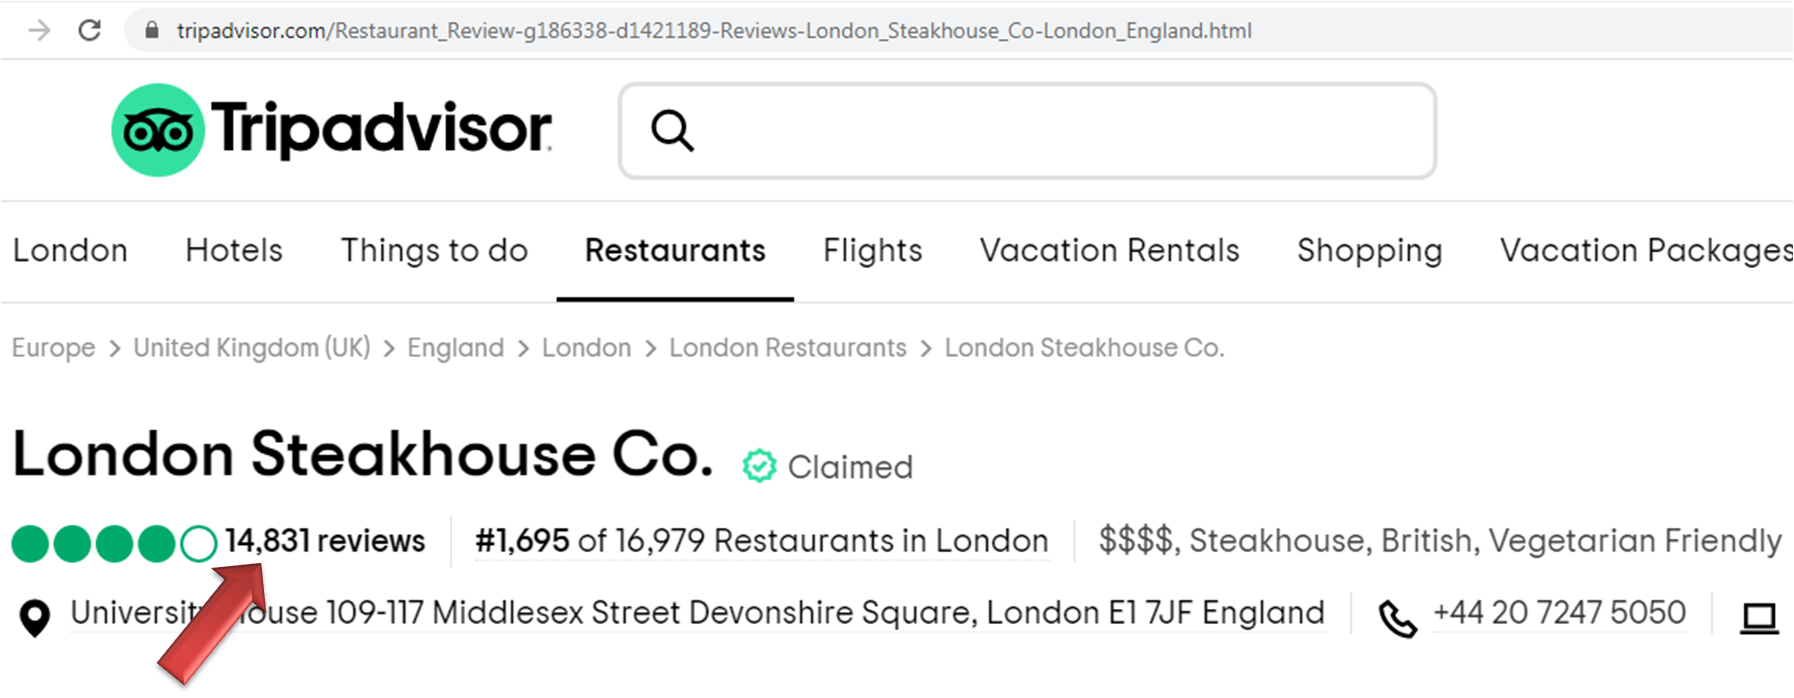

Однако за время пути... За три прошедших года количество отзывов весьма возросло - с 9660 до 14831...

*Заменим пропуски частым значением с учётом города.*

In [16]:
#------------------------------------------------------------------------------#
df = data.copy()
for city in cities.index:
    for_replacing = df[df.City==city].Number_of_Reviews.value_counts().index[0]
    df.loc[df.City==city, "Number_of_Reviews"] = \
            df[df.City==city].Number_of_Reviews.replace(np.nan, for_replacing)
df.Number_of_Reviews.isnull().sum()
data_Number_of_Reviews = df[["Number_of_Reviews"]]

#### *1.4. Признак Number_of_Reviews. Количество отзывов посетителей о ресторане. Выводы.*
1. Есть слабая отрицательная связь между Number_of_Reviews и Ranking, т.е. чем больше отзывов, тем ближе ранг ресторана к первым позициям. Линейная связь между Number_of_Reviews и Rating практически отсутствует.
2. Распределение Number_of_Reviews имеет обратный характер по сравнению с распределением ранга ресторана. В случае с рангом мы видели, что чем выше рейтинг ресторана, тем меньше ранг; в случае с числом отзывов мы наблюдаем обратную картину - чем выше рейтинг ресторана, тем больше количество отзывов посетителей о нём.
3. На фоне этих зависимостей сильно выделяется ситуация с ресторанами, которые имеют максимальный рейтинг в 5 баллов. У них среднее число отзывов существенно ниже, чем у ресторанов с баллом в 4.5.

На мой взгляд, ситуацию с ресторанами в 5 баллов можно объяснить следующим образом. Допустим, открылся новый ресторанчик; предположим, что персонал ресторана действительно радеет за качество обслуживания. Как мы выяснили ранее, этот ресторан учитывается на сайте TripAdvisor только под своим порядковым номером и находится в конце списка. В ранжировании участия не принимает до первого отзыва посетителей. Наконец, кто-то из посетителей оставляет первый отзыв, в котором высоко оценивает ресторан. Факт появления отзыва включает ресторан в систему ранжирования, и ресторану присуждается самый большой из существующих рангов, т.е. это ресторанчик оказывается дальше всех от первой позиции по рангу, но зато с высоким рейтингом. Мы видели пример выше - один из лондонских ресторанчиков "Best Fried Chicken".


Посетителей приходит всё больше, всё чаще оставляются отзывы. Однако дело в том, что люди всегда чем-то недовольны - погодой, пробками, общественным транспортом, соседями, правительством, интегродифференциальными уравнениями... Обязательно и непременно среди отзывов, растущих в числе, начнут появляться отзывы "чувствительно-недовольных" людей. Это обязательно произойдёт, как дважды два четыре. То ножи для них недостаточно острые, то вилки недостаточно плоские... По мере накопления таких отзывов наступает момент, когда ресторан попадает на пол-балла ниже. И т.д.

Неудивительно поэтому, что рейтинг 4 является самым распространённым для представленных ресторанов. Кстати, можно оценить пропорцию этих "чувствительно-недовольных" людей среди человеков как отношение количества ресторанов с баллом 5 к общему количеству ресторанов: 3879 / 40000 * 100% = 9.7%. Каждый десятый, однако...
***

***
#### *1.5. Признак Price Range. Диапазон цен в ресторане.*

*Пропуски:*  
Price_Range   : $13\,886$

In [17]:
#------------------------------------------------------------------------------#
df = data.copy()
print("Количество пропусков:", df["Price_Range"].isnull().sum())
print(df["Price_Range"].value_counts())

Количество пропусков: 13886
$$ - $$$    18412
$            6279
$$$$         1423
Name: Price_Range, dtype: int64


Заменим пропуски на самый популярный - средний - ценовой диапазон.

In [18]:
#------------------------------------------------------------------------------#
df["Price_Range"] = df["Price_Range"].apply(lambda x: 2 if pd.isnull(x) else x)
dct_price = {"$": 1, "$$ - $$$": 2, "$$$$": 3}
df["Price_Range"] = df["Price_Range"].replace(to_replace=dct_price)
print(df["Price_Range"].value_counts().sort_index())

data_Price_Range = df[["Restaurant_id", "Price_Range"]]

1     6279
2    32298
3     1423
Name: Price_Range, dtype: int64


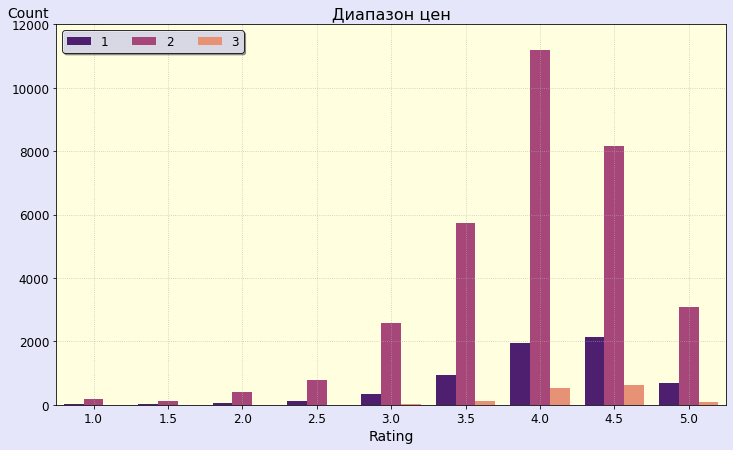

In [19]:
#------------------------------------------------------------------------------#
gr = df.groupby(["Price_Range","Rating"]).ID_TA.count()
gr = gr.reset_index().rename({"ID_TA": "Count"}, axis="columns")

fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(x="Rating", y="Count", data=gr, hue="Price_Range", ci=None,
            palette="magma");
ax.grid("both")
ax.set_ylabel("Count", rotation=0, position=(0, 1.01), ha="left")
ax.set_yticks(range(0, 14000, 2000)); ax.legend(loc="upper left", ncol=3);
ax.set_title("Диапазон цен");

***
#### *1.6. Признак Reviews. Данные о двух отзывах, которые отображаются на сайте ресторана.*

In [20]:
#------------------------------------------------------------------------------#
pattern = re.compile("\d+\/\d+\/\d+")
df = data.copy()

df["date_rev"] = df["Reviews"].apply(pattern.findall)
display(df["date_rev"].head(15))
# Видим, что в общем случае в парах нет хронологического порядка.
# Отсеиваем случаи, когда дата имеется в комментариях:
df["date_rev"] = df["date_rev"].apply(lambda x: [x[-2], x[-1]] if len(x)>=3
                                      else x)
# Сортируем в хронологическом порядке:
df["date_rev"] = df["date_rev"].apply(pd.to_datetime).apply(sorted)
# Случаи с одной датой и с двумя датами:
df["rev_1"] = df["date_rev"].apply(lambda x: x[0] if len(x)>=1 else None)
df["rev_2"] = df["date_rev"].apply(lambda x: x[1] if len(x)==2 else None)
# При таком способе разделения двух дат возникает следующая ситуация:
# -- если есть только одна дата, она будет записана в столбец "rev_1",
#    а в столбце "rev_2" окажется "темпоральное ничто" NaT.
# Таким образом, в общем случае количество пропусков в столбце "rev_1"
# будет меньше, чем в столбце "rev_2". Смотрим:
qNaT_1 = df.rev_1.isnull().sum(); qNaT_2 = df.rev_2.isnull().sum()
print(f"Количество пропусков:\nrev_1: {qNaT_1},  rev_2: {qNaT_2}\n")

# Граничные данные:
print("Самая свежая дата:", df[["rev_1", "rev_2"]].max().max().strftime(
                                                                    "%Y-%m-%d"))
print("Самая ранняя дата:", df[["rev_1", "rev_2"]].min().min().strftime(
                                                                    "%Y-%m-%d"))
max_days = abs(df["rev_2"] - df["rev_1"]).max().days
print("Количество дней: ", max_days)
#------------------------------------------------------------------------------#
# Проверяем самый ранний отзыв:
df[df.rev_1==df.rev_1.min()].URL_TA.values

0     [12/31/2017, 11/20/2017]
1     [07/06/2017, 06/19/2016]
2     [01/08/2018, 01/06/2018]
3                           []
4     [11/18/2017, 02/19/2017]
5     [09/16/2017, 05/31/2017]
6     [08/04/2017, 11/05/2017]
7     [02/16/2014, 06/13/2012]
8                           []
9     [11/07/2017, 03/27/2017]
10                          []
11    [12/15/2017, 11/22/2017]
12    [01/07/2018, 12/27/2017]
13    [07/25/2017, 05/30/2017]
14                          []
Name: date_rev, dtype: object

Количество пропусков:
rev_1: 6471,  rev_2: 11027

Самая свежая дата: 2018-02-26
Самая ранняя дата: 2004-04-21
Количество дней:  3207


array(['/Restaurant_Review-g190454-d694328-Reviews-Babu-Vienna.html'],
      dtype=object)

### Оказывается, самый ранний отзыв, датируемый 22-ым апреля 2004 года, реально существует (сайт TripAdvisor):
***
  
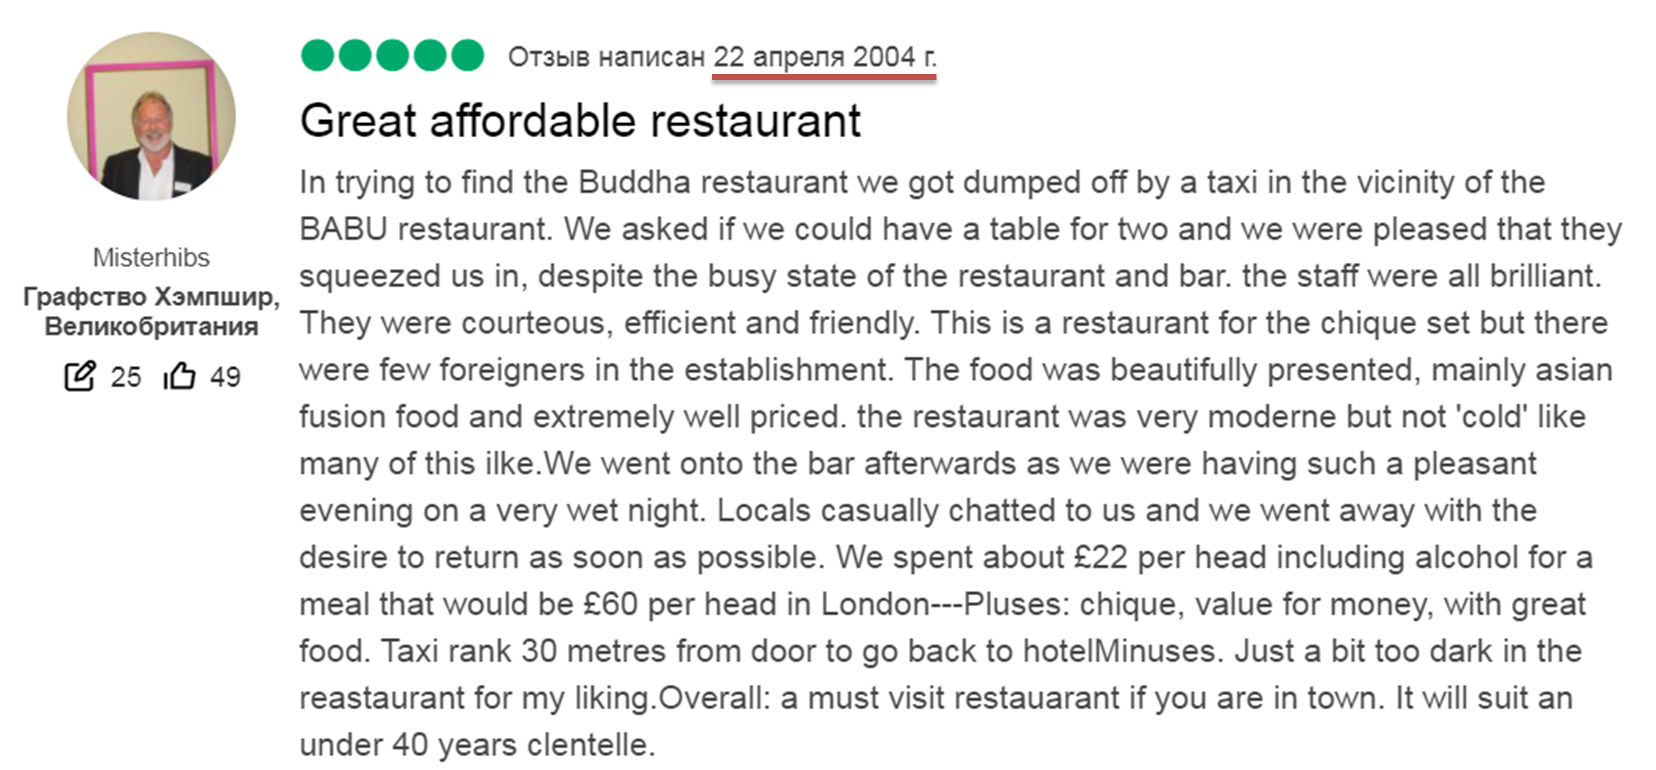

*Создадим новый признак "days_reviews" - количество дней между двумя отзывами. Пропуски заполним медианой.*

In [21]:
#------------------------------------------------------------------------------#
df["days_reviews"] = abs(df.rev_2 - df.rev_1).dt.days
display(df.days_reviews.value_counts())
for_na = df.days_reviews.median()
df["days_reviews"] = df["days_reviews"].fillna(for_na)
# Если ноль дней, то 1:
df["days_reviews"] = df["days_reviews"].apply(lambda x: 1 if x<1 else x)
display(df.days_reviews.value_counts())

data_days_reviews = df[["Restaurant_id", "days_reviews"]]

1.0       664
2.0       523
3.0       496
0.0       492
4.0       431
         ... 
2940.0      1
1818.0      1
1032.0      1
722.0       1
1543.0      1
Name: days_reviews, Length: 1228, dtype: int64

67.0      11146
1.0        1156
2.0         523
3.0         496
4.0         431
          ...  
875.0         1
966.0         1
1440.0        1
775.0         1
1045.0        1
Name: days_reviews, Length: 1227, dtype: int64

---
*Посмотрим на популярные годы, месяцы, дни месяца и дни недели - в колонках "rev_1" и "rev_2".*  
Подчеркнём, что это относится к моменту написания отзыва, а не визита в ресторан.

In [22]:
#------------------------------------------------------------------------------#
dct = {
    "rev_1":
        {"year": df.rev_1.dt.year.mode()[0],
         "month": df.rev_1.dt.month.mode()[0],
         "day_of_month": df.rev_1.dt.day.mode()[0],
         "day_of_week": df.rev_1.dt.dayofweek.mode()[0]},
    "rev_2":
        {"year": df.rev_2.dt.year.mode()[0],
         "month": df.rev_2.dt.month.mode()[0],
         "day_of_month": df.rev_2.dt.day.mode()[0],
         "day_of_week": df.rev_2.dt.dayofweek.mode()[0]}
}
df_items = pd.DataFrame(dct).T
df_items.columns.names = ["Популярные для написания отзыва:"]
display(df_items)

Популярные для написания отзыва:    year  month  day_of_month  day_of_week
rev_1                             2017.0   12.0           6.0          6.0
rev_2                             2017.0   12.0           7.0          6.0

Насколько велика популярность этих частей даты?  
*Для **первого** столбца отзывов "rev_1":*

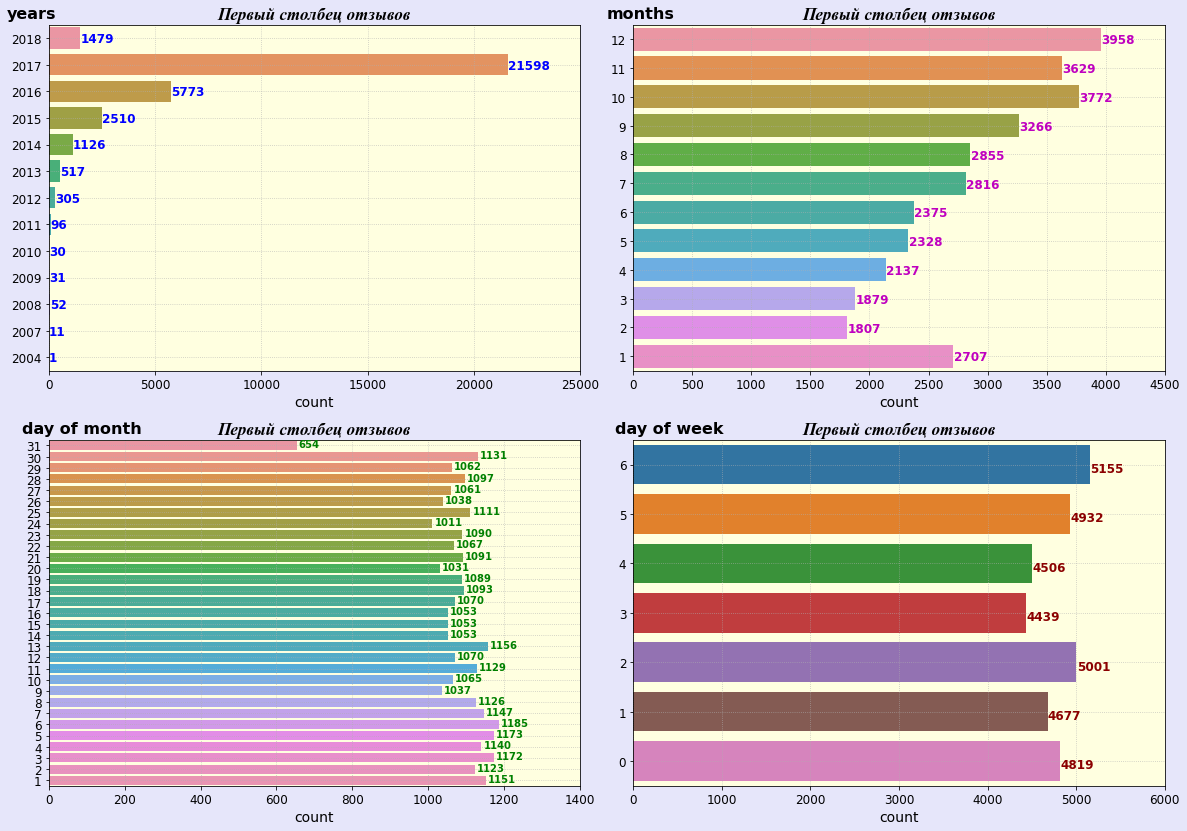

In [23]:
#------------------------------------------------------------------------------#
fig, ax = plt.subplots(2, 2, figsize=(20, 14))
fig.subplots_adjust(wspace=0.1); fig.subplots_adjust(hspace=0.2)
[ax[i,j].set_title('Первый столбец отзывов', fontweight='bold', style='italic',
fontsize = 17, fontname='Times New Roman') for i in range(2) for j in range(2)];
#------------------------------------------------------------------------------#
# Годы:
years_1 = df.rev_1.dt.year.value_counts().reset_index().rename(
                                {"index": "years", "rev_1": "count"}, axis=1)
years_1["years"] = years_1["years"].apply(int)
years_1 = years_1.sort_values(by="years", ascending=False)
ord_years_1 = years_1["years"].values
# Месяцы:
months_1 = df.rev_1.dt.month.value_counts().reset_index().rename(
                                {"index": "months", "rev_1": "count"}, axis=1)
months_1["months"] = months_1["months"].apply(int)
months_1 = months_1.sort_values(by="months", ascending=False)
ord_months_1 = months_1["months"].values
# Дни месяца:
days_1 = df.rev_1.dt.day.value_counts().reset_index().rename(
                                {"index": "days", "rev_1": "count"}, axis=1)
days_1["days"] = days_1["days"].apply(int)
days_1 = days_1.sort_values(by="days", ascending=False)
ord_days_1 = days_1["days"].values
# Дни недели:
dweek_1 = df.rev_1.dt.dayofweek.value_counts().reset_index().rename(
                            {"index": "day_of_week", "rev_1": "count"}, axis=1)
dweek_1["day_of_week"] = dweek_1["day_of_week"].apply(int)
dweek_1 = dweek_1.sort_values(by="day_of_week", ascending=False)
ord_dweek_1 = dweek_1["day_of_week"].values
#------------------------------------------------------------------------------#
sns.barplot(x="count", y="years", data=years_1, ci=None, orient="h", ax=ax[0,0],
            order=ord_years_1);
#---
ax[0,0].set_ylabel("years", rotation=0, position=(0, 1.01), ha="left",
                    fontsize=16, fontweight='bold'); ax[0,0].grid("both")
for k, val in enumerate(years_1["count"].values):
    ax[0,0].text(val + 5, k+0.15, str(val), color='blue', fontsize=12,
                 fontweight='bold')
ax[0,0].set_xticks([x for x in range(0, 30000, 5000)]);
#------------------------------------------------------------------------------#
sns.barplot(x="count", y="months", data=months_1, ci=None, orient="h",
                                      ax=ax[0,1], order=ord_months_1);
#---
ax[0,1].set_ylabel("months", rotation=0, position=(0, 1.01), ha="left",
                    fontsize=16, fontweight='bold'); ax[0,1].grid("both")
for k, val in enumerate(months_1["count"].values):
    ax[0,1].text(val + 5, k+0.15, str(val), color='m', fontsize=12,
                 fontweight='bold')
ax[0,1].set_xticks([x for x in range(0, 5000, 500)]);
#------------------------------------------------------------------------------#
sns.barplot(x="count", y="days", data=days_1, ci=None, orient="h",
                                      ax=ax[1,0], order=ord_days_1);
#---
ax[1,0].set_ylabel("day of month", rotation=0, position=(0, 1.01), ha="left",
                    fontsize=16, fontweight='bold'); ax[1,0].grid("both")
for k, val in enumerate(days_1["count"].values):
    ax[1,0].text(val + 5, k+0.15, str(val), color='g', fontsize=10,
                 fontweight='bold')
ax[1,0].set_xticks([x for x in range(0, 1600, 200)]);
#------------------------------------------------------------------------------#
sns.barplot(x="count", y="day_of_week", data=dweek_1, ci=None, orient="h",
                                      ax=ax[1,1], order=ord_dweek_1);
#---
ax[1,1].set_ylabel("day of week", rotation=0, position=(0, 1.01), ha="left",
                    fontsize=16, fontweight='bold'); ax[1,1].grid("both")
for k, val in enumerate(dweek_1["count"].values):
    ax[1,1].text(val + 5, k+0.15, str(val), color='darkred', fontsize=12,
                 fontweight='bold')
ax[1,1].set_xticks([x for x in range(0, 7000, 1000)]);

*Для **второго** столбца отзывов "rev_2":*

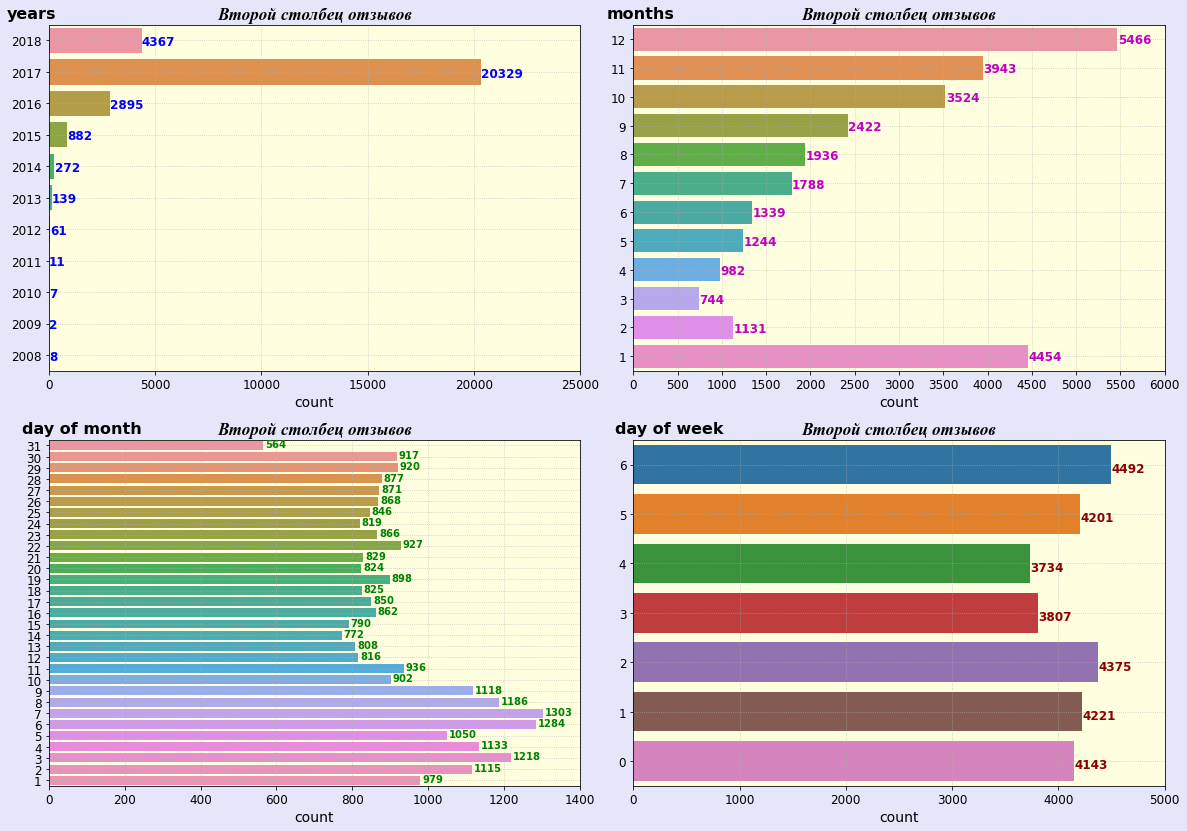

In [24]:
#------------------------------------------------------------------------------#
fig, ax = plt.subplots(2, 2, figsize=(20, 14))
fig.subplots_adjust(wspace=0.1); fig.subplots_adjust(hspace=0.2)
[ax[i,j].set_title('Второй столбец отзывов', fontweight='bold', style='italic',
fontsize = 17, fontname='Times New Roman') for i in range(2) for j in range(2)];
#------------------------------------------------------------------------------#
# Годы:
years_2 = df.rev_2.dt.year.value_counts().reset_index().rename(
                                {"index": "years", "rev_2": "count"}, axis=1)
years_2["years"] = years_2["years"].apply(int)
years_2 = years_2.sort_values(by="years", ascending=False)
ord_years_2 = years_2["years"].values
# Месяцы:
months_2 = df.rev_2.dt.month.value_counts().reset_index().rename(
                                {"index": "months", "rev_2": "count"}, axis=1)
months_2["months"] = months_2["months"].apply(int)
months_2 = months_2.sort_values(by="months", ascending=False)
ord_months_2 = months_2["months"].values
# Дни месяца:
days_2 = df.rev_2.dt.day.value_counts().reset_index().rename(
                                {"index": "days", "rev_2": "count"}, axis=1)
days_2["days"] = days_2["days"].apply(int)
days_2 = days_2.sort_values(by="days", ascending=False)
ord_days_2 = days_2["days"].values
# Дни недели:
dweek_2 = df.rev_2.dt.dayofweek.value_counts().reset_index().rename(
                            {"index": "day_of_week", "rev_2": "count"}, axis=1)
dweek_2["day_of_week"] = dweek_2["day_of_week"].apply(int)
dweek_2 = dweek_2.sort_values(by="day_of_week", ascending=False)
ord_dweek_2 = dweek_2["day_of_week"].values
#------------------------------------------------------------------------------#
sns.barplot(x="count", y="years", data=years_2, ci=None, orient="h", ax=ax[0,0],
            order=ord_years_2);
#---
ax[0,0].set_ylabel("years", rotation=0, position=(0, 1.01), ha="left",
                    fontsize=16, fontweight='bold'); ax[0,0].grid("both")
for k, val in enumerate(years_2["count"].values):
    ax[0,0].text(val + 5, k+0.15, str(val), color='blue', fontsize=12,
                 fontweight='bold')
ax[0,0].set_xticks([x for x in range(0, 30000, 5000)]);
#------------------------------------------------------------------------------#
sns.barplot(x="count", y="months", data=months_2, ci=None, orient="h",
                                      ax=ax[0,1], order=ord_months_2);
#---
ax[0,1].set_ylabel("months", rotation=0, position=(0, 1.01), ha="left",
                    fontsize=16, fontweight='bold'); ax[0,1].grid("both")
for k, val in enumerate(months_2["count"].values):
    ax[0,1].text(val + 5, k+0.15, str(val), color='m', fontsize=12,
                 fontweight='bold')
ax[0,1].set_xticks([x for x in range(0, 6500, 500)]);
#------------------------------------------------------------------------------#
sns.barplot(x="count", y="days", data=days_2, ci=None, orient="h",
                                      ax=ax[1,0], order=ord_days_2);
#---
ax[1,0].set_ylabel("day of month", rotation=0, position=(0, 1.01), ha="left",
                    fontsize=16, fontweight='bold'); ax[1,0].grid("both")
for k, val in enumerate(days_2["count"].values):
    ax[1,0].text(val + 5, k+0.15, str(val), color='g', fontsize=10,
                 fontweight='bold')
ax[1,0].set_xticks([x for x in range(0, 1600, 200)]);
#------------------------------------------------------------------------------#
sns.barplot(x="count", y="day_of_week", data=dweek_2, ci=None, orient="h",
                                      ax=ax[1,1], order=ord_dweek_2);
#---
ax[1,1].set_ylabel("day of week", rotation=0, position=(0, 1.01), ha="left",
                    fontsize=16, fontweight='bold'); ax[1,1].grid("both")
for k, val in enumerate(dweek_2["count"].values):
    ax[1,1].text(val + 5, k+0.15, str(val), color='darkred', fontsize=12,
                 fontweight='bold')
ax[1,1].set_xticks([x for x in range(0, 6000, 1000)]);

---
_**Отзывы и даты**_. Новые признаки для года, месяца и дня написания отзывов.  
Для формирования упомянутых признаков представляется целесообразным учитывать индивидуальные особенности городов, представленных в базе данных. В качестве анализа рассмотрим характерные три города северной и три города южной Европы:
    1. NE. Северная Европа (Скандинавия): Stockholm, Oslo, Helsinki
    2. SE. Южная Европа (Средиземноморье): Rome, Madrid, Athens
При этом рассмотрим отзывы для второй колонки rev_2.

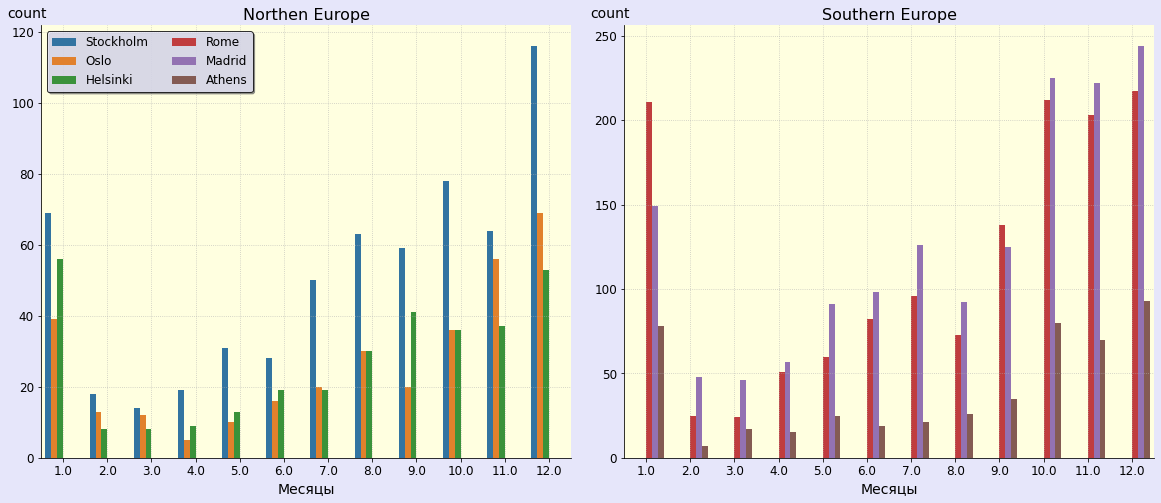

In [25]:
#------------------------------------------------------------------------------#
df_NE = df.query('City in ("Stockholm", "Oslo", "Helsinki")')[["City", "rev_2"]]
df_NE["Europe"] = "Northern Europe"
df_SE = df.query('City in ("Madrid", "Rome", "Athens")')[["City", "rev_2"]]
df_SE["Europe"] = "Southern Europe"

df_NE["months_2"] = df.rev_2.dt.month; df_SE["months_2"] = df.rev_2.dt.month
df_NE_SE = pd.concat([df_NE, df_SE], ignore_index=True)
#------------------------------------------------------------------------------#
sns.catplot(kind="count", x="months_2", data=df_NE_SE, hue="City",
                col="Europe", palette="tab10", sharey=False, legend_out=False)
#---
fig = plt.gcf(); ax = fig.get_axes(); fig.set_size_inches(17, 8)
fig.subplots_adjust(wspace=0.1);
ax[0].set_title("Northen Europe"); ax[1].set_title("Southern Europe")
[axs.grid("both") for axs in ax]
[axs.set_xlabel("Месяцы") for axs in ax];
[axs.set_ylabel("count", rotation=0, position=(0, 1.01), ha="left")
                                                                for axs in ax];
ax[0].set_yticks([y for y in range(0, 140, 20)]);
ax[1].set_yticks([y for y in range(0, 300, 50)]);
ax[0].legend(ncol=2, loc="upper left");

1. В рассмотренных городах Северной Европы декабрь сильно выделяется на фоне других месяцев. Напротив, в городах Южной Европы отсутствует выраженное отличие декабря от других месяцев.  
2. Минимальные по популярности отзывов (по популярности у туристов?) месяцы - конец зимы, начало весны: февраль, март и апрель.  

А впрочем, есть ведь ещё и альпийские города Швейцарии и Франции...  
*Сформируем новые признаки даты отзывов для последующего добавления к датафрейму:*

In [26]:
#------------------------------------------------------------------------------#
df["year_rev_1"] = df["year_rev_2"] = 1
df["month_rev_1"] = df["month_rev_2"] = 1
df["day_of_month_rev_1"] = df["day_of_month_rev_2"] = 1
for city in df.City.unique():
    mostly_year_1 = df[df.City==city].rev_1.dt.year.value_counts().index[0]
    mostly_year_2 = df[df.City==city].rev_2.dt.year.value_counts().index[0]
    mostly_month_1 = df[df.City==city].rev_1.dt.month.value_counts().index[0]
    mostly_month_2 = df[df.City==city].rev_2.dt.month.value_counts().index[0]
    mostly_day_1 = df[df.City==city].rev_1.dt.day.value_counts().index[0]
    mostly_day_2 = df[df.City==city].rev_2.dt.day.value_counts().index[0]
    #---
    df.loc[df.City==city, "year_rev_1"] = df[df.City==city].rev_1.apply(
                            lambda x: mostly_year_1 if pd.isnull(x) else x.year)
    df.loc[df.City==city, "year_rev_2"] = df[df.City==city].rev_2.apply(
                            lambda x: mostly_year_2 if pd.isnull(x) else x.year)
    df.loc[df.City==city, "month_rev_1"] = df[df.City==city].rev_1.apply(
                        lambda x: mostly_month_1 if pd.isnull(x) else x.month)
    df.loc[df.City==city, "month_rev_2"] = df[df.City==city].rev_2.apply(
                        lambda x: mostly_month_2 if pd.isnull(x) else x.month)
    df.loc[df.City==city, "day_of_month_rev_1"] = df[df.City==city].rev_1.apply(
                        lambda x: mostly_day_1 if pd.isnull(x) else x.day)
    df.loc[df.City==city, "day_of_month_rev_2"] = df[df.City==city].rev_2.apply(
                        lambda x: mostly_day_2 if pd.isnull(x) else x.day)
#---
cols = ["year_rev_1", "year_rev_2", "month_rev_1", "month_rev_2",
        "day_of_month_rev_1", "day_of_month_rev_2"]
data_reviews_dates = df[cols].copy()
data_reviews_dates.head(10)


year_rev_1  year_rev_2  month_rev_1  month_rev_2  day_of_month_rev_1  \
0      2017.0      2017.0         11.0         12.0                20.0   
1      2016.0      2017.0          6.0          7.0                19.0   
2      2018.0      2018.0          1.0          1.0                 6.0   
3      2017.0      2017.0          8.0         12.0                 3.0   
4      2017.0      2017.0          2.0         11.0                19.0   
5      2017.0      2017.0          5.0          9.0                31.0   
6      2017.0      2017.0          8.0         11.0                 4.0   
7      2012.0      2014.0          6.0          2.0                13.0   
8      2017.0      2017.0          9.0         12.0                26.0   
9      2017.0      2017.0          3.0         11.0                27.0   

   day_of_month_rev_2  
0                31.0  
1                 6.0  
2                 8.0  
3                 9.0  
4                18.0  
5                16.0  
6                 5.0  
7                16.0  
8                 7.0  
9                 7.0

#### *1.6. Признак Reviews. Выводы.*
* **Год.** В обоих случаях (rev_1 и rev_2) самым популярным годом написания отзывов является 2017-ый. Он резко (в разы) выделяется на фоне других годов. Любопытный аспект, на мой взгляд. Понятно, что далеко не каждый посетитель будет оставлять отзыв. Однако чем больше посетителей, тем больше отзывов при прочих равных условиях...
* **Месяц**. Месяцы выделяются не так сильно, как годы, но в обоих случаях можно видеть популярность осенне-зимних месяцев. Особенно ярко выделяется декабрь. Казалось бы, туристический сезон - это, в основном, летние и отчасти весенние и осенние месяцы. В любом случае, надо смотреть по городам - например, по городам южной и северной Европы. Как бы то ни было, можно в качестве гипотезы считать, что распределение отзывов по месяцам характеризует распределение туристов по месяцам года.
* **День месяца**. Здесь рапределение ещё более равномерное (по сравнению с месяцами). Выделяется 31-ый день месяца как день наименьших отзывов. По-видимому, это связано с тем, что 31-ый день месяца - самый редкий в году по сравнению с, например, 1-ым днём месяца. В самом деле, за года 31-ый день встречается лишь в 7 случаях из 12, т.е. доля 31-ого дня есть $7\,/\,12 = 0.58$. Левый нижний график для rev_1 даёт 654 случая для 31-го дня и 1151 случаев для 1-го дня месяца, т.е. $654\,/\,1151 = 0.57$; для rev_2 имеем 564 для 31-го и 979 для 1-го дня, т.е. $564\,/\,979 = 0.58$.
* **День недели**. Ну, здесь самое равномерное распределение. Есть некоторые отклонения, популярным формально получается воскресенье.

Я не стал формировать дополнительные признаки в виде дней недели - в силу того, что они распределены более-менее равномерно.

---
#### 1.7. Новые признаки, связанные с городами.
Признак City является категориальным номинального типа. Однако дерево решений индиффирентно по отношению к номинальности или ординальности категорий признака (хотя есть некоторая специфика при реализации алгоритмов решающего дерева). Поэтому, чтобы не плодить множество колонок при применении dummies-переменных, преобразуем признак City в числовой с помощью словаря, в котором каждом городу ставится в соответствие целое число.  
Однако предварительно добавим в исходную базу данных новые признаки, характеризующие город. Для этого я создал в Excel простую таблицу с новыми признаками и сохранил её в виде csv-файла.
***
_**Рассмотрим, что это за новые признаки:**_

In [27]:
data_cities = pd.read_csv("data_cities.csv", sep=";")
display(data_cities.head())
del data_cities["Source d'information sur des touristes"]
data_cities.columns

City  country  citizens  citizens_density  restaurants_number  \
0     London  England   8908081              5667               16986   
1      Paris   France   2148327             20781               15467   
2     Madrid    Spain   3266126              5380               10112   
3  Barcelona    Spain   1664182             16428                8622   
4     Berlin  Germany   3644826              4088                6372   

   citizens_per_restaurant  restaurants_density  tourists_per_year  \
0                      524                   11           19233000   
1                      139                  150           17560200   
2                      323                   17            5440100   
3                      193                   85            6714500   
4                      572                    7            5959400   

   tourists_per_citizens  total_per_restaurant  \
0                   2.16                  1657   
1                   8.17                  1274   
2                   1.67                   861   
3                   4.03                   972   
4                   1.64                  1507   

              Source d'information sur des touristes  
0  Wikipedia, List of cities by international vis...  
1  Wikipedia, List of cities by international vis...  
2  Wikipedia, List of cities by international vis...  
3  Wikipedia, List of cities by international vis...  
4  Wikipedia, List of cities by international vis...

Index(['City', 'country', 'citizens', 'citizens_density', 'restaurants_number',
       'citizens_per_restaurant', 'restaurants_density', 'tourists_per_year',
       'tourists_per_citizens', 'total_per_restaurant'],
      dtype='object')

##### Новые признаки для городов и ресторанов имеют следующий смысл:  
***
* **country** - страна, в которой находится город
* **citizens** - население города, чел. (источник: Википедия)
* **citizens_density** - плотность населения города, $чел./км^2$ (Википедия)
* **restaurants_number** - количество ресторанов, участвующих в рейтинге (TripAdvisor).
* **citizens_per_restaurant** - количество горожан на один ресторан
* **restaurants_density** - средняя плотность ресторанов в городе, $1/км^2$
* **tourists_per_year** - количество туристов, посетивших город в течение года, чел. (Wikipedia, List of cities by international visitors)
* **tourists_per_citizens** - отношение числа туристов за год к населению города (кратность туристов)
* **total_per_restaurant** - (количество туристов + население города) / количество ресторанов
***
_**Добавим новые признаки к исходной базе данных:**_

In [28]:
data_new = pd.merge(data, data_cities, on="City", how="left")

#### *Посмотрим на связи между "новыми" и "старыми" признаками*

tourists_per_year  Number_of_Reviews  Ranking  \
tourists_per_year                     1.00               0.04     0.66   
Number_of_Reviews                     0.04               1.00    -0.22   
Ranking                               0.66              -0.22     1.00   
Rating                               -0.02               0.03    -0.37   
citizens                              0.74               0.02     0.57   
citizens_density                      0.44              -0.01     0.33   
restaurants_number                    0.93               0.05     0.70   
restaurants_density                   0.36              -0.01     0.25   
total_per_restaurant                 -0.02              -0.02    -0.20   
tourists_per_citizens                -0.02              -0.01    -0.12   
citizens_per_restaurant               0.00              -0.04     0.02   

                         Rating  citizens  citizens_density  \
tourists_per_year         -0.02      0.74              0.44   
Number_of_Reviews          0.03      0.02             -0.01   
Ranking                   -0.37      0.57              0.33   
Rating                     1.00     -0.02             -0.05   
citizens                  -0.02      1.00             -0.10   
citizens_density          -0.05     -0.10              1.00   
restaurants_number        -0.05      0.77              0.47   
restaurants_density       -0.05     -0.24              0.94   
total_per_restaurant       0.07     -0.05             -0.32   
tourists_per_citizens     -0.00     -0.44              0.31   
citizens_per_restaurant    0.04      0.50             -0.58   

                         restaurants_number  restaurants_density  \
tourists_per_year                      0.93                 0.36   
Number_of_Reviews                      0.05                -0.01   
Ranking                                0.70                 0.25   
Rating                                -0.05                -0.05   
citizens                               0.77                -0.24   
citizens_density                       0.47                 0.94   
restaurants_number                     1.00                 0.36   
restaurants_density                    0.36                 1.00   
total_per_restaurant                  -0.32                -0.33   
tourists_per_citizens                 -0.17                 0.54   
citizens_per_restaurant               -0.02                -0.70   

                         total_per_restaurant  tourists_per_citizens  \
tourists_per_year                       -0.02                  -0.02   
Number_of_Reviews                       -0.02                  -0.01   
Ranking                                 -0.20                  -0.12   
Rating                                   0.07                  -0.00   
citizens                                -0.05                  -0.44   
citizens_density                        -0.32                   0.31   
restaurants_number                      -0.32                  -0.17   
restaurants_density                     -0.33                   0.54   
total_per_restaurant                     1.00                   0.15   
tourists_per_citizens                    0.15                   1.00   
citizens_per_restaurant                  0.36                  -0.68   

                         citizens_per_restaurant  
tourists_per_year                           0.00  
Number_of_Reviews                          -0.04  
Ranking                                     0.02  
Rating                                      0.04  
citizens                                    0.50  
citizens_density                           -0.58  
restaurants_number                         -0.02  
restaurants_density                        -0.70  
total_per_restaurant                        0.36  
tourists_per_citizens                      -0.68  
citizens_per_restaurant                     1.00

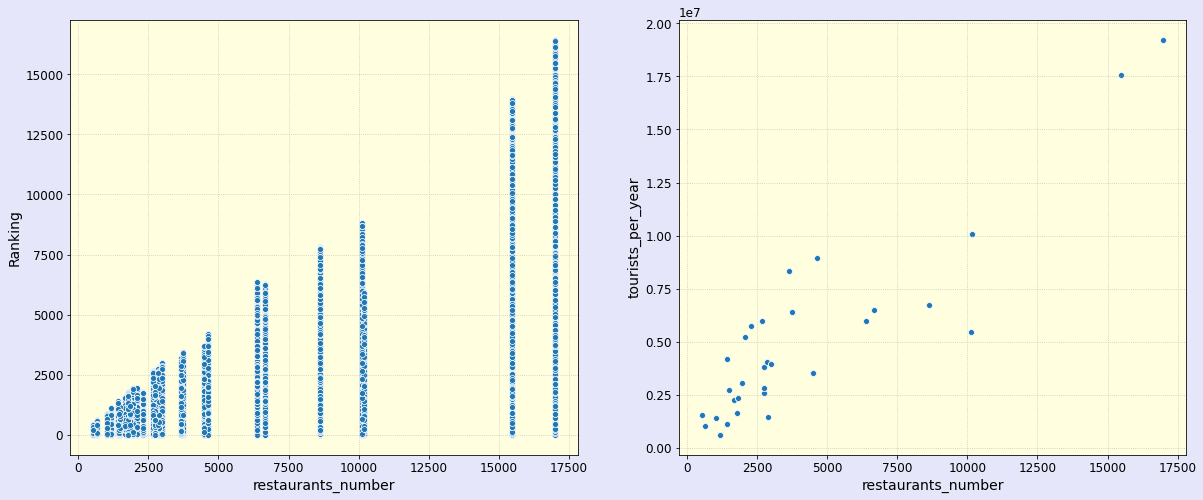

In [29]:
#------------------------------------------------------------------------------#
df = data_new.copy()
display(df[["tourists_per_year", "Number_of_Reviews", "Ranking", "Rating",
            "citizens", "citizens_density", "restaurants_number",
            "restaurants_density", "total_per_restaurant", 
        "tourists_per_citizens", "citizens_per_restaurant"]].corr().round(2))
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(data=df, x="restaurants_number", y="Ranking", ax=ax[0]);
sns.scatterplot(data=df, x="restaurants_number", y="tourists_per_year", ax=ax[1]);

#### *1.7. Новые признаки, связанные с городами. Выводы.*

* Наблюдается сильная связь между restaurants_number и рангом Ranking. Это понятно - чем больше ресторанов в городе, тем шире диапазон рангов.
* Чем больше город, тем больше в нём жителей и туристов. Хорошо видна связь между количеством ресторанов в городе и количеством жителей/туристов.

---
#### *1.8. Кухни Cuisine_Style и города/страны.*

Пропуски:  
Cuisine_Style : $9\,283$

*Основная идея - заменить пропуски данных в признаке Cuisine_Style национальными кухнями.*

In [30]:
#------------------------------------------------------------------------------#
df = data_new.copy()
df["Cuisine_Style"] = df["Cuisine_Style"].apply(clean_name)
# Создаём Series, содержащий национальные кухни для стран:
cuisine_dct = {}
for country in df.country.value_counts().index:
    cname = df[df.country==country]["Cuisine_Style"].value_counts().index[0]
    if cname==["Unknown"]:
        cname = df[df.country==country]["Cuisine_Style"].value_counts().index[1]
    cuisine_dct[country] = cname
cuisine_country = pd.Series(cuisine_dct)
cuisine_country

Spain                       [Spanish]
France                       [French]
England           [Bar, British, Pub]
Italy                       [Italian]
Germany                     [Italian]
Portugal       [European, Portuguese]
Czech               [European, Czech]
Poland             [Polish, European]
Austria          [Austrian, European]
Netherlands         [Dutch, European]
Belgium           [Belgian, European]
Switzerland                 [Italian]
Sweden            [European, Swedish]
Hungary         [European, Hungarian]
Ireland             [Irish, Bar, Pub]
Denmark            [European, Danish]
Greece                        [Greek]
Scotland                       [Cafe]
Norway                          [Pub]
Finland                    [Bar, Pub]
Slovakia                        [Pub]
Luxembourg                   [French]
Slovenia        [European, Slovenian]
dtype: object

1. Germany. Итальянская кухня очень популярна - настолько, что рестораны Германии предлагают эту кухню чаще германской (это если не учитывать пропуски данных). Не будем обижать немцев, и заполним пропуски для Германии национальной кухней Германии ["German"].
2. Switzerland. То же самое относительно итальянской кухни. Заполним пропуски для ресторанов Швейцарии национальной швейцарской кухней, точнее - списком из двух кухонь: ["Swiss", "European"].
3. Scotland. Заполним пропуски следующим списком: ["Bar", "British", "Pub", "Scottish"].
4. Norway: ["European", "Norwegian"].
5. Finland: ["European", "Scandinavian"].
6. К сожалению, в базе данных почему-то отсутствует национальная словацкая кухня. В принципе, учитывая прозвище Братиславы "маленькая Прага", можно было бы использовать чешскую кухню для заполнения пропусков, но мы будем использовать часто повторяющуюся для Братиславы кухню под названием ["Pub"]. Видимо, рестораны Братиславы слишком сильно ориентированы на иностранных туристов...

In [31]:
#------------------------------------------------------------------------------#
cuisine_country.loc["Switzerland"] = ["Swiss", "European"]
cuisine_country.loc["Germany"] = ["German"]
cuisine_country.loc["Scotland"] = ["Bar", "British", "Pub", "Scottish"]
cuisine_country.loc["Norway"] = ["European", "Norwegian"]
cuisine_country.loc["Finland"] = ["European", "Scandinavian"]
cuisine_country

Spain                              [Spanish]
France                              [French]
England                  [Bar, British, Pub]
Italy                              [Italian]
Germany                             [German]
Portugal              [European, Portuguese]
Czech                      [European, Czech]
Poland                    [Polish, European]
Austria                 [Austrian, European]
Netherlands                [Dutch, European]
Belgium                  [Belgian, European]
Switzerland                [Swiss, European]
Sweden                   [European, Swedish]
Hungary                [European, Hungarian]
Ireland                    [Irish, Bar, Pub]
Denmark                   [European, Danish]
Greece                               [Greek]
Scotland       [Bar, British, Pub, Scottish]
Norway                 [European, Norwegian]
Finland             [European, Scandinavian]
Slovakia                               [Pub]
Luxembourg                          [French]
Slovenia  

*Заменим пропуски национальными кухнями.*

In [32]:
#------------------------------------------------------------------------------#
def fillna_cuisine(row):
    if row["Cuisine_Style"]==["Unknown"]:
        row["Cuisine_Style"] = cuisine_country.loc[row.country]
    return row

data_new = df.apply(lambda row: fillna_cuisine(row), axis=1)
print("Количество пропусков:", data_new.Cuisine_Style.isnull().sum())

Количество пропусков: 0


_**Преобразуем кухни и сочетания кухонь в числа.**_  

Это можно сделать двумя способами:
1. Преобразовать кухни в векторные dummies-переменные, воспользовавшись MultiLabelBinarizer. Это приведёт к появлению дополнительных 125 колонок (как будет видно ниже, имеется 125 уникальных имён кухонь).
2. Альтернативный вариант, основанный на том, что алгоритм решающего дерева безразличен к ординальности или номинальности категорийного признака. Это позволяет поставить в соответствие уникальным именам кухонь битовый идентификатор, а комбинации кухонь отмечать "склейкой" отдельных битов в один "длинный" бит. Вместо 125 колонок "векторных" признаков получим всего одну колонку числовых идентификаторов.

Я попробую оба способа.

##### *1.8.1. Преобразование Cuisine_Style с использованием MultiLabelBinarizer.*

In [33]:
#------------------------------------------------------------------------------#
from sklearn.preprocessing import MultiLabelBinarizer

dff = data_new[["Cuisine_Style"]].copy() # Уже заполненные пропуски данных

mlb = MultiLabelBinarizer()
data_Cuisine_Style_MLB = pd.DataFrame(mlb.fit_transform(dff["Cuisine_Style"]),
                                                          columns=mlb.classes_)
data_Cuisine_Style_MLB

Afghani  African  Albanian  American  Arabic  Argentinean  Armenian  \
0            0        0         0         0       0            0         0   
1            0        0         0         0       0            0         0   
2            0        0         0         0       0            0         0   
3            0        0         0         0       0            0         0   
4            0        0         0         0       0            0         0   
...        ...      ...       ...       ...     ...          ...       ...   
39995        0        0         0         0       0            0         0   
39996        0        0         0         1       0            0         0   
39997        0        0         0         0       0            0         0   
39998        0        0         0         0       0            0         0   
39999        0        0         0         0       0            0         0   

       Asian  Australian  Austrian  ...  Ukrainian  Uzbek  Vegan Options  \
0          0           0         0  ...          0      0              0   
1          0           0         0  ...          0      0              0   
2          1           0         0  ...          0      0              1   
3          0           0         0  ...          0      0              0   
4          0           0         0  ...          0      0              0   
...      ...         ...       ...  ...        ...    ...            ...   
39995      0           0         0  ...          0      0              1   
39996      0           0         0  ...          0      0              0   
39997      0           0         0  ...          0      0              0   
39998      0           0         0  ...          0      0              0   
39999      0           0         0  ...          0      0              0   

       Vegetarian Friendly  Venezuelan  Vietnamese  Welsh  Wine Bar  Xinjiang  \
0                        0           0           0      0         0         0   
1                        0           0           0      0         0         0   
2                        1           0           0      0         0         0   
3                        0           0           0      0         0         0   
4                        1           0           0      0         0         0   
...                    ...         ...         ...    ...       ...       ...   
39995                    1           0           0      0         0         0   
39996                    1           0           0      0         0         0   
39997                    0           0           0      0         0         0   
39998                    1           0           0      0         0         0   
39999                    0           0           0      0         0         0   

       Yunnan  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
39995       0  
39996       0  
39997       0  
39998       0  
39999       0  

[40000 rows x 125 columns]

In [34]:
#------------------------------------------------------------------------------#
df = data_new.copy()
df = df.explode("Cuisine_Style")
print("Количество уникальных названий кухонь:", df.Cuisine_Style.nunique())

Количество уникальных названий кухонь: 125


##### *1.8.2. Преобразование Cuisine_Style с использованием битовых идентификаторов.*
*Итак, имеем 125 уникальных имён кухонь.*  
Поставим в соответствие каждому уникальному имени кухни двоичное число. Какой длины? Очевидно, для этого достаточно $N = 2^7 = 128$ бит.  
Иначе говоря, двоичное число длиной 7 бит.

In [35]:
#------------------------------------------------------------------------------#
# Упорядочим по алфавиту:
cuisine_bit = df.Cuisine_Style.value_counts().sort_index().index
# Генерируем битовые идентификаторы (от 1 до 125):
name_bit = [bin(k)[2:].zfill(7) for k in range(1, 126)]
# Таблица соответствия:
cuisine_bit = pd.Series(name_bit, name="bit_name", index=cuisine_bit)
cuisine_bit

Afghani       0000001
African       0000010
Albanian      0000011
American      0000100
Arabic        0000101
               ...   
Vietnamese    1111001
Welsh         1111010
Wine Bar      1111011
Xinjiang      1111100
Yunnan        1111101
Name: bit_name, Length: 125, dtype: object

*Преобразование списков кухонь в числовые значения*  
Алгоритм такого преобразования состоит в следующем:
* Берём список кухонь из текущего поля исходного датафрейма (признак "Cuisine_Style") и упорядочиваем по алфавиту
* Идём в списке слева направо, "склеивая" битовые идентификаторы имён кухонь в списке в один "длинный" бит

Например, пусть есть список lst = ['Albanian', 'Wine Bar'], тогда bit_lst = '0000011' + '1111011' = '00000111111011' => int(bit_lst, base=2) = 507. Никакая другая комбинация бит не даст такого же значения, т.е. число 507 однозначно характеризует именно этот список кухонь. К сожалению, алгоритм случайного леса использует float32, а максимальная комбинация кухонь содержит 21 наименование. Получающееся в результате целое число даже после его преобразования в вещественное число вызывает ошибку при реализации случайного леса. Самое простое решение - логарифм.

In [36]:
#------------------------------------------------------------------------------#
def cuisine_to_num(lst):
    lst = sorted(lst)
    lst_bit = [cuisine_bit.loc[lst[k]] for k in range(len(lst))]
    val = float(int(''.join(lst_bit), base=2))
    return np.log2(val)
#------------------------------------------------------------------------------#
# Создаём новый признак "cuisine_num":
data_new["cuisine_num"] = data_new.Cuisine_Style.apply(cuisine_to_num)
# Добавим признак "Number_of_Cuisines":
data_new["Number_of_Cuisines"] = data_new["Cuisine_Style"].apply(len)

display(data_new[["Cuisine_Style", "Number_of_Cuisines", "cuisine_num"]])
print("Максимальное количество предлагаемых кухонь в ресторане:", 
      data_new.Number_of_Cuisines.max())

Cuisine_Style  Number_of_Cuisines  \
0                      [European, French, International]                   3   
1                                    [European, Swedish]                   2   
2      [Japanese, Sushi, Asian, Grill, Vegetarian Fri...                   7   
3                                               [German]                   1   
4        [German, Central European, Vegetarian Friendly]                   3   
...                                                  ...                 ...   
39995  [Italian, Vegetarian Friendly, Vegan Options, ...                   4   
39996  [French, American, Bar, European, Vegetarian F...                   5   
39997                                  [Japanese, Sushi]                   2   
39998  [Polish, European, Eastern European, Central E...                   5   
39999                                          [Spanish]                   1   

       cuisine_num  
0        19.503948  
1        12.518899  
2        45.074732  
3         5.727920  
4        18.878790  
...            ...  
39995    26.768790  
39996    30.039891  
39997    13.105254  
39998    32.873966  
39999     6.700440  

[40000 rows x 3 columns]

Максимальное количество предлагаемых кухонь в ресторане: 21


***
### 2. Приготовление окончательной таблицы данных. 

***
#### *2.1. Заменим City и country на числовые идентификаторы.*
Как и в случае с кухнями, попробуем реализовать оба способа трансформации названий в числовую форму:
1. Используя LabelBinarizer или get_dummies, что приведёт к появлению множества колонок из названий стран и городов.
2. Применяя обучную нумерацию с помощью LabelEncoder или словаря. Это не увеличит количества колонок.

##### *2.1.1. Преобразование City и contry с использованием "векторной" трансформации.*

In [37]:
#------------------------------------------------------------------------------#
from sklearn.preprocessing import LabelBinarizer
df = pd.merge(data, data_cities, on="City", how="left")
lblbinarizer = LabelBinarizer()
# Города:
City_bin = lblbinarizer.fit_transform(df["City"])
data_city_bin = pd.DataFrame(City_bin, columns=lblbinarizer.classes_)
# Страны:
Country_bin = lblbinarizer.fit_transform(df["country"])
data_country_bin = pd.DataFrame(Country_bin, columns=lblbinarizer.classes_)
#---
display(data_city_bin); display(data_country_bin)
num = len(data_city_bin.columns) + len(data_country_bin.columns)
print(f"Дополнительные колонки: {num} шт.")

Amsterdam  Athens  Barcelona  Berlin  Bratislava  Brussels  Budapest  \
0              0       0          0       0           0         0         0   
1              0       0          0       0           0         0         0   
2              0       0          0       0           0         0         0   
3              0       0          0       1           0         0         0   
4              0       0          0       0           0         0         0   
...          ...     ...        ...     ...         ...       ...       ...   
39995          0       0          0       0           0         0         0   
39996          0       0          0       0           0         0         0   
39997          0       0          0       0           0         0         0   
39998          0       0          0       0           0         0         0   
39999          0       0          0       0           0         0         0   

       Copenhagen  Dublin  Edinburgh  ...  Munich  Oporto  Oslo  Paris  \
0               0       0          0  ...       0       0     0      1   
1               0       0          0  ...       0       0     0      0   
2               0       0          0  ...       0       0     0      0   
3               0       0          0  ...       0       0     0      0   
4               0       0          0  ...       1       0     0      0   
...           ...     ...        ...  ...     ...     ...   ...    ...   
39995           0       0          0  ...       0       0     0      0   
39996           0       0          0  ...       0       0     0      1   
39997           0       0          0  ...       0       0     0      0   
39998           0       0          0  ...       0       0     0      0   
39999           0       0          0  ...       0       0     0      0   

       Prague  Rome  Stockholm  Vienna  Warsaw  Zurich  
0           0     0          0       0       0       0  
1           0     0          1       0       0       0  
2           0     0          0       0       0       0  
3           0     0          0       0       0       0  
4           0     0          0       0       0       0  
...       ...   ...        ...     ...     ...     ...  
39995       0     0          0       0       0       0  
39996       0     0          0       0       0       0  
39997       0     0          1       0       0       0  
39998       0     0          0       0       1       0  
39999       0     0          0       0       0       0  

[40000 rows x 31 columns]

Austria  Belgium  Czech  Denmark  England  Finland  France  Germany  \
0            0        0      0        0        0        0       1        0   
1            0        0      0        0        0        0       0        0   
2            0        0      0        0        1        0       0        0   
3            0        0      0        0        0        0       0        1   
4            0        0      0        0        0        0       0        1   
...        ...      ...    ...      ...      ...      ...     ...      ...   
39995        0        0      0        0        0        0       0        0   
39996        0        0      0        0        0        0       1        0   
39997        0        0      0        0        0        0       0        0   
39998        0        0      0        0        0        0       0        0   
39999        0        0      0        0        0        0       0        0   

       Greece  Hungary  ...  Netherlands  Norway  Poland  Portugal  Scotland  \
0           0        0  ...            0       0       0         0         0   
1           0        0  ...            0       0       0         0         0   
2           0        0  ...            0       0       0         0         0   
3           0        0  ...            0       0       0         0         0   
4           0        0  ...            0       0       0         0         0   
...       ...      ...  ...          ...     ...     ...       ...       ...   
39995       0        0  ...            0       0       0         0         0   
39996       0        0  ...            0       0       0         0         0   
39997       0        0  ...            0       0       0         0         0   
39998       0        0  ...            0       0       1         0         0   
39999       0        0  ...            0       0       0         0         0   

       Slovakia  Slovenia  Spain  Sweden  Switzerland  
0             0         0      0       0            0  
1             0         0      0       1            0  
2             0         0      0       0            0  
3             0         0      0       0            0  
4             0         0      0       0            0  
...         ...       ...    ...     ...          ...  
39995         0         0      0       0            0  
39996         0         0      0       0            0  
39997         0         0      0       1            0  
39998         0         0      0       0            0  
39999         0         0      0       0            0  

[40000 rows x 23 columns]

Дополнительные колонки: 54 шт.


##### *2.1.2. Преобразование City и contry с помощью числовых меток.*
Преобразуем города с помощью словаря, пронумеровав их по мере увеличения количества ресторанов в них. Страны трансформируем с помощью LabelEncoder - этот класс упорядочит страны по алфавиту.

In [38]:
#------------------------------------------------------------------------------#
from sklearn.preprocessing import LabelEncoder
lblencoder = LabelEncoder()
#---
df = pd.merge(data, data_cities, on="City", how="left")
# Города:
city_vals = df.City.value_counts(ascending=True)
city_dict = {city_vals.index[k]: k for k in range(len(city_vals.values))}
data_city_num = df.replace(to_replace=city_dict)[["City"]]
print(city_dict)
# Страны:
data_country_num = pd.DataFrame(lblencoder.fit_transform(df["country"]),
                               columns=["country"])
print({lblencoder.classes_[k]: k for k in range(len(lblencoder.classes_))})
data_country_num.join(data_city_num).join(df[["country", "City"]], rsuffix="_1")

{'Ljubljana': 0, 'Luxembourg': 1, 'Bratislava': 2, 'Helsinki': 3, 'Oslo': 4, 'Krakow': 5, 'Geneva': 6, 'Oporto': 7, 'Zurich': 8, 'Edinburgh': 9, 'Athens': 10, 'Copenhagen': 11, 'Dublin': 12, 'Warsaw': 13, 'Budapest': 14, 'Stockholm': 15, 'Lyon': 16, 'Munich': 17, 'Hamburg': 18, 'Brussels': 19, 'Amsterdam': 20, 'Vienna': 21, 'Lisbon': 22, 'Prague': 23, 'Rome': 24, 'Milan': 25, 'Berlin': 26, 'Barcelona': 27, 'Madrid': 28, 'Paris': 29, 'London': 30}
{'Austria': 0, 'Belgium': 1, 'Czech': 2, 'Denmark': 3, 'England': 4, 'Finland': 5, 'France': 6, 'Germany': 7, 'Greece': 8, 'Hungary': 9, 'Ireland': 10, 'Italy': 11, 'Luxembourg': 12, 'Netherlands': 13, 'Norway': 14, 'Poland': 15, 'Portugal': 16, 'Scotland': 17, 'Slovakia': 18, 'Slovenia': 19, 'Spain': 20, 'Sweden': 21, 'Switzerland': 22}


country  City country_1     City_1
0            6    29    France      Paris
1           21    15    Sweden  Stockholm
2            4    30   England     London
3            7    26   Germany     Berlin
4            7    17   Germany     Munich
...        ...   ...       ...        ...
39995       11    25     Italy      Milan
39996        6    29    France      Paris
39997       21    15    Sweden  Stockholm
39998       15    13    Poland     Warsaw
39999       11    25     Italy      Milan

[40000 rows x 4 columns]

***
#### *2.2. Отзывы  Number_of_Reviews и количество дней между отзывами days_reviews.*

In [39]:
data_new["Number_of_Reviews"] = data_Number_of_Reviews["Number_of_Reviews"]

Добавим признак "days_reviews".


Также добавим новый признак "Reviews_per_day", равный отношению количества отзывов к количеству дней между двумя отзывами на сайте ресторана.



In [40]:
data_new["days_reviews"] = data_days_reviews["days_reviews"]
data_new["Reviews_per_day"] = data_new["Number_of_Reviews"] / data_new["days_reviews"]

#### *2.3. Признак Price_Range.*

In [41]:
data_new["Price_Range"] = data_Price_Range["Price_Range"]

#### *2.4. Годы, месяцы и дни для дат отзывов.*

In [42]:
data_new = data_new.join(data_reviews_dates)
data_new.head()

Restaurant_id       City                                      Cuisine_Style  \
0       id_5569      Paris                  [European, French, International]   
1       id_1535  Stockholm                                [European, Swedish]   
2        id_352     London  [Japanese, Sushi, Asian, Grill, Vegetarian Fri...   
3       id_3456     Berlin                                           [German]   
4        id_615     Munich    [German, Central European, Vegetarian Friendly]   

   Ranking  Rating  Price_Range  Number_of_Reviews  \
0   5570.0     3.5            2              194.0   
1   1537.0     4.0            2               10.0   
2    353.0     4.5            3              688.0   
3   3458.0     5.0            2                3.0   
4    621.0     4.0            2               84.0   

                                             Reviews  \
0  [['Good food at your doorstep', 'A good hotel ...   
1  [['Unique cuisine', 'Delicious Nepalese food']...   
2  [['Catch up with friends', 'Not exceptional'],...   
3                                           [[], []]   
4  [['Best place to try a Bavarian food', 'Nice b...   

                                              URL_TA     ID_TA  ...  \
0  /Restaurant_Review-g187147-d1912643-Reviews-R_...  d1912643  ...   
1  /Restaurant_Review-g189852-d7992032-Reviews-Bu...  d7992032  ...   
2  /Restaurant_Review-g186338-d8632781-Reviews-RO...  d8632781  ...   
3  /Restaurant_Review-g187323-d1358776-Reviews-Es...  d1358776  ...   
4  /Restaurant_Review-g187309-d6864963-Reviews-Au...  d6864963  ...   

  cuisine_num  Number_of_Cuisines  days_reviews  Reviews_per_day  year_rev_1  \
0   19.503948                   3          41.0         4.731707      2017.0   
1   12.518899                   2         382.0         0.026178      2016.0   
2   45.074732                   7           2.0       344.000000      2018.0   
3    5.727920                   1          67.0         0.044776      2017.0   
4   18.878790                   3         272.0         0.308824      2017.0   

   year_rev_2  month_rev_1  month_rev_2  day_of_month_rev_1  \
0      2017.0         11.0         12.0                20.0   
1      2017.0          6.0          7.0                19.0   
2      2018.0          1.0          1.0                 6.0   
3      2017.0          8.0         12.0                 3.0   
4      2017.0          2.0         11.0                19.0   

   day_of_month_rev_2  
0                31.0  
1                 6.0  
2                 8.0  
3                 9.0  
4                18.0  

[5 rows x 29 columns]

In [43]:
#------------------------------------------------------------------------------#
df_regr = data_new.join(data_Cuisine_Style_MLB).join(data_city_bin)
df_regr = df_regr.join(data_country_bin, rsuffix="_country")
df_regr["City"] = data_city_num["City"]
df_regr["country"] = data_country_num["country"]

df_regr.drop(["Restaurant_id", "Cuisine_Style", "Reviews", "URL_TA", "ID_TA", 
             ], axis=1, inplace=True)

df_regr

City  Ranking  Rating  Price_Range  Number_of_Reviews  country  \
0        29   5570.0     3.5            2              194.0        6   
1        15   1537.0     4.0            2               10.0       21   
2        30    353.0     4.5            3              688.0        4   
3        26   3458.0     5.0            2                3.0        7   
4        17    621.0     4.0            2               84.0        7   
...     ...      ...     ...          ...                ...      ...   
39995    25    500.0     4.5            2               79.0       11   
39996    29   6341.0     3.5            2              542.0        6   
39997    15   1652.0     4.5            2                4.0       21   
39998    13    641.0     4.0            2               70.0       15   
39999    25   4827.0     3.0            2              260.0       11   

       citizens  citizens_density  restaurants_number  \
0       2148327             20781               15467   
1        961609              5140                2729   
2       8908081              5667               16986   
3       3644826              4088                6372   
4       1471508              4713                2848   
...         ...               ...                 ...   
39995   1378689              7589                6668   
39996   2148327             20781               15467   
39997    961609              5140                2729   
39998   1790658              3449                2739   
39999   1378689              7589                6668   

       citizens_per_restaurant  ...  Netherlands  Norway  Poland  Portugal  \
0                          139  ...            0       0       0         0   
1                          352  ...            0       0       0         0   
2                          524  ...            0       0       0         0   
3                          572  ...            0       0       0         0   
4                          517  ...            0       0       0         0   
...                        ...  ...          ...     ...     ...       ...   
39995                      207  ...            0       0       0         0   
39996                      139  ...            0       0       0         0   
39997                      352  ...            0       0       0         0   
39998                      654  ...            0       0       1         0   
39999                      207  ...            0       0       0         0   

       Scotland  Slovakia  Slovenia  Spain  Sweden  Switzerland  
0             0         0         0      0       0            0  
1             0         0         0      0       1            0  
2             0         0         0      0       0            0  
3             0         0         0      0       0            0  
4             0         0         0      0       0            0  
...         ...       ...       ...    ...     ...          ...  
39995         0         0         0      0       0            0  
39996         0         0         0      0       0            0  
39997         0         0         0      0       1            0  
39998         0         0         0      0       0            0  
39999         0         0         0      0       0            0  

[40000 rows x 203 columns]

### 3. Реализация Random Forrest Regression

#### Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [44]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df_regr.drop(['Rating'], axis = 1)
y = df_regr['Rating']
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Создаём, обучаем и тестируем модель

In [45]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)
# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)
y_pred = np.round(y_pred * 2) / 2
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', (metrics.mean_absolute_error(y_test, y_pred)).round(3))

MAE: 0.175
